# LIBRARY

In [1]:
import pandas as pd
from dataset import Dataset
from dataread import Dataread
import seaborn as sns
import matplotlib.pyplot as plt
import os
import fsspec
import pyarrow.parquet as pq

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

ds = Dataset()
dr = Dataread()
JSON_KEY_PATH = "./sprintda05-soomin.json"
os.environ["GOOGlE_APPLICATION_CREDENTIALS"] = JSON_KEY_PATH
fs = fsspec.filesystem("gcs")


In [7]:
df = ds.votes.polls_question()
df['month'] = df['created_at'].dt.strftime('%Y-%m')
df['day'] = df['created_at'].dt.strftime('%Y-%m-%d')

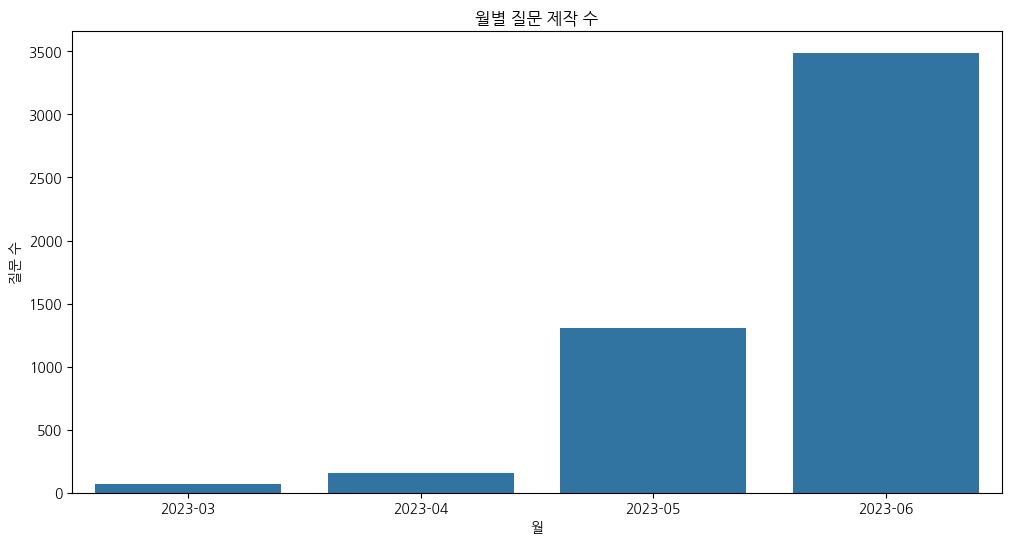

In [13]:
plt.figure(figsize=(12, 6))
df_month = df.groupby('month').size().reset_index(name='count')

sns.barplot(data = df_month, x='month', y='count')
plt.title('월별 질문 제작 수')
plt.xlabel('월')
plt.ylabel('질문 수')
plt.show()

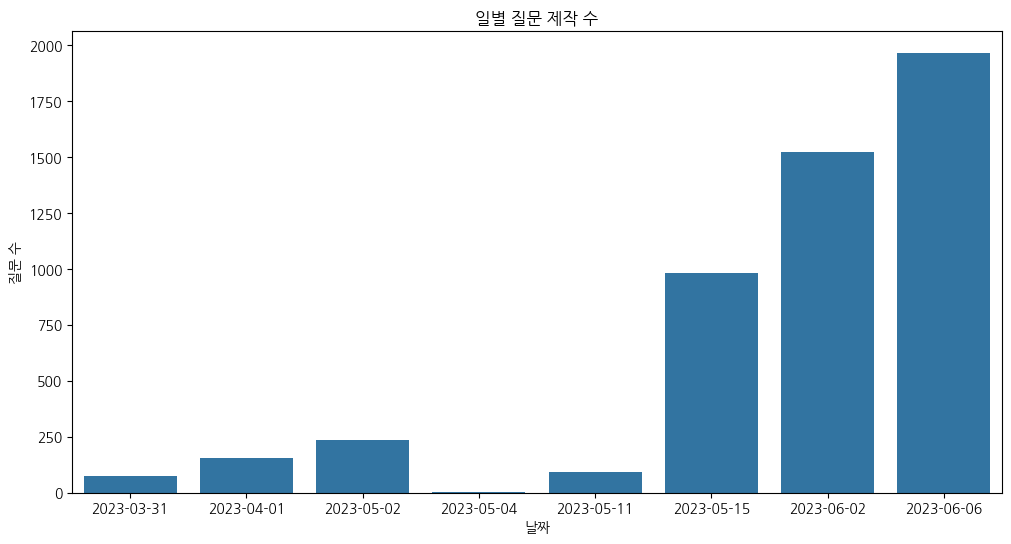

In [17]:
plt.figure(figsize=(12, 6))
df_month = df.groupby('day').size().reset_index(name='count')

sns.barplot(data = df_month, x='day', y='count')
plt.title('일별 질문 제작 수')
plt.xlabel('날짜')
plt.ylabel('질문 수')
plt.show()

# Hackle

In [3]:
hackle_files = ds.hackle.file_list()
datapath = "gs://final-project-soomin/final_project/hackle"
for file in hackle_files:
    file_path = f"{datapath}/{file}.parquet"
    df = pd.read_parquet(file_path,
                         engine = "pyarrow",
                        storage_options= {"token": JSON_KEY_PATH})
    
    print(file)
    display(df.head(6))
    try:
        print(f'''
min : {df['event_datetime'].min()}
max : {df['event_datetime'].max()}
''')
    except:
        print("\n No 'event_datetime' column found. \n")
    print("\n" + "-" * 50 + "-" * 50 + "\n\n")
    df.info()
    print("\n" + "=" * 50 + "=" * 50 + "\n\n")

del datapath, df, file_path, hackle_files

device_properties


,id,device_id,device_model,device_vendor
0,1,000007C9-E103-4EB5-9777-A9084D4952DF,"iPhone14,7",Apple
1,2,00002245-458F-4CDD-8533-B448CD43DBD2,"iPhone14,7",Apple
2,3,00012620-313A-4502-9F8D-8DAB7443215B,"iPhone14,5",Apple
3,4,000137bc-80de-4bb5-b61d-df7f217a4501,SM-F711N,samsung
4,5,000227D6-B782-4367-91C4-486B76DF9E37,"iPhone12,3",Apple
5,6,00025EE1-BA46-4853-8FDD-B991FABA328F,"iPhone12,8",Apple



 No 'event_datetime' column found. 


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252380 entries, 0 to 252379
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             252380 non-null  int64 
 1   device_id      252380 non-null  object
 2   device_model   252380 non-null  object
 3   device_vendor  252380 non-null  object
dtypes: int64(1), object(3)
memory usage: 7.7+ MB



hackle_events


,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,00000533-3f1c-4b3b-81f1-0c8f35754b4e,,,NaN,NaN,NaN,NaN
1,00000716-27e9-4e72-a602-d0ce61784b06,2023-07-18 21:07:24,click_question_open,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,00000716-27e9-4e72-a602-d0ce61784b06,,,64.0,436.0,4830.0,NaN
2,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,2023-08-06 20:18:03,click_bottom_navigation_profile,6bcea65d-9f40-46fc-888c-700fe707483f,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,,,26.0,174.0,4729.0,NaN
3,00000981-5e2a-4111-993e-4f1891ad9a53,2023-08-05 01:46:10,view_shop,XVYNT6zfhFWqIg9omwg2AHDjTLx2,00000981-5e2a-4111-993e-4f1891ad9a53,,,61.0,44.0,142.0,NaN
4,00000a7a-ba72-4332-b4a9-7910670aaeb2,2023-07-24 15:03:37,click_bottom_navigation_lab,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,00000a7a-ba72-4332-b4a9-7910670aaeb2,,,119.0,545.0,3287.0,NaN
5,00000bfa-93ff-41d0-9b3a-c59ca76c0599,2023-07-29 18:39:10,$session_end,LztzUUFoRxdqTSPgQrX3MAAyNkM2,00000bfa-93ff-41d0-9b3a-c59ca76c0599,,,NaN,NaN,NaN,NaN



min : 2023-07-18 00:00:00
max : 2023-08-10 23:59:59


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11441319 entries, 0 to 11441318
Data columns (total 11 columns):
 #   Column          Dtype         
---  ------          -----         
 0   event_id        object        
 1   event_datetime  datetime64[ms]
 2   event_key       object        
 3   session_id      object        
 4   id              object        
 5   item_name       object        
 6   page_name       object        
 7   friend_count    float64       
 8   votes_count     float64       
 9   heart_balance   float64       
 10  question_id     float64       
dtypes: datetime64[ms](1), float64(4), object(6)
memory usage: 960.2+ MB



hackle_properties


,id,session_id,user_id,language,osname,osversion,versionname,device_id
0,1,4OzYh3seq3VKytpSn5pvQkZNQii1,,ko-KR,iOS,16.0,2.0.0,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74
1,2,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,1046711,ko-KR,iOS,16.5.1,2.0.3,D5417226-F71B-4A9E-A180-CD072F2AB279
2,3,6bcea65d-9f40-46fc-888c-700fe707483f,1545130,ko,Android,13,2.0.5,6bcea65d-9f40-46fc-888c-700fe707483f
3,4,XVYNT6zfhFWqIg9omwg2AHDjTLx2,1224793,ko,Android,13,2.0.5,a05c1595-3e05-434b-8684-218b528bd725
4,5,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,1329450,ko-US,iOS,16.5.1,2.0.5,EAC6C0B3-7CE8-40EA-8A91-9977C0BA5EF3
5,6,LztzUUFoRxdqTSPgQrX3MAAyNkM2,LztzUUFoRxdqTSPgQrX3MAAyNkM2,ko-KR,iOS,16.1,2.0.5,3F199073-9390-4137-B0B0-0DC4FC103009



 No 'event_datetime' column found. 


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525350 entries, 0 to 525349
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           525350 non-null  int64 
 1   session_id   525350 non-null  object
 2   user_id      525350 non-null  object
 3   language     525350 non-null  object
 4   osname       525350 non-null  object
 5   osversion    525350 non-null  object
 6   versionname  525350 non-null  object
 7   device_id    525350 non-null  object
dtypes: int64(1), object(7)
memory usage: 32.1+ MB



user_properties


,user_id,class,gender,grade,school_id
0,1000000,1,M,1,1885
1,1000009,10,F,2,3869
2,1000012,10,F,1,5091
3,1000013,8,F,2,1743
4,1000015,2,F,3,5078
5,1000018,2,F,3,2523



 No 'event_datetime' column found. 


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230819 entries, 0 to 230818
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    230819 non-null  object
 1   class      230819 non-null  int64 
 2   gender     230819 non-null  object
 3   grade      230819 non-null  int64 
 4   school_id  230819 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 8.8+ MB





In [4]:
hackle_events_df = ds.hackle.hackle_events()
hackle_events_df['event_id'].equals(hackle_events_df['id'])

True

In [5]:
random_session_id = hackle_events_df['session_id'].sample(n=1).values[0]
temp = hackle_events_df.loc[hackle_events_df['session_id'] == random_session_id].sort_values('event_datetime', ascending=True)
display(temp.head(5), temp.tail(5))

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
4970354,6f20ac6b-e574-44af-ad9b-0fb395b081d0,2023-07-18 18:51:38,$session_start,XKtTKtvR5hS9SRjCDQxvmCXqIqJ3,6f20ac6b-e574-44af-ad9b-0fb395b081d0,,,NaN,NaN,NaN,NaN
5632828,7df7f8c8-0d0d-4682-96f9-6470401c06fa,2023-07-18 18:51:38,launch_app,XKtTKtvR5hS9SRjCDQxvmCXqIqJ3,7df7f8c8-0d0d-4682-96f9-6470401c06fa,,,NaN,NaN,NaN,NaN
4623375,675b0c3c-4f34-4ee0-9974-5195fcbd26e3,2023-07-18 18:51:38,$session_end,XKtTKtvR5hS9SRjCDQxvmCXqIqJ3,675b0c3c-4f34-4ee0-9974-5195fcbd26e3,,,NaN,NaN,NaN,NaN
953958,15583bcb-8c41-45cf-8211-0faa2129feef,2023-07-18 18:51:41,$session_start,XKtTKtvR5hS9SRjCDQxvmCXqIqJ3,15583bcb-8c41-45cf-8211-0faa2129feef,,,NaN,NaN,NaN,NaN
1162921,1a07ee95-7bde-4bf8-a4ad-343b3e515f52,2023-07-18 18:52:05,launch_app,XKtTKtvR5hS9SRjCDQxvmCXqIqJ3,1a07ee95-7bde-4bf8-a4ad-343b3e515f52,,,58.0,183.0,341.0,NaN


,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
3737401,5393092c-e143-4de7-8745-bdef771d2c55,2023-08-02 17:16:39,click_question_open,XKtTKtvR5hS9SRjCDQxvmCXqIqJ3,5393092c-e143-4de7-8745-bdef771d2c55,,,58.0,183.0,141.0,NaN
3604336,509a1f56-e1fb-4502-a5dc-23bb462376da,2023-08-02 17:16:46,click_bottom_navigation_profile,XKtTKtvR5hS9SRjCDQxvmCXqIqJ3,509a1f56-e1fb-4502-a5dc-23bb462376da,,,58.0,183.0,141.0,NaN
3338703,4aa7ea1d-8eab-4cbd-833c-fffb45549b15,2023-08-02 17:16:46,view_lab_tap,XKtTKtvR5hS9SRjCDQxvmCXqIqJ3,4aa7ea1d-8eab-4cbd-833c-fffb45549b15,,,58.0,183.0,141.0,NaN
10924567,f46a1583-1b10-44e3-a7fc-5a2207cfb43e,2023-08-02 17:16:46,view_profile_tap,XKtTKtvR5hS9SRjCDQxvmCXqIqJ3,f46a1583-1b10-44e3-a7fc-5a2207cfb43e,,,58.0,183.0,141.0,NaN
4580452,66664185-168a-45f2-82bf-8abb89c9a51d,2023-08-02 17:16:46,view_timeline_tap,XKtTKtvR5hS9SRjCDQxvmCXqIqJ3,66664185-168a-45f2-82bf-8abb89c9a51d,,,58.0,183.0,141.0,NaN


# Votes

In [6]:
votes_files = ds.votes.file_list()
datapath = "gs://final-project-soomin/final_project/votes"
for file in votes_files:
    file_path = f"{datapath}/{file}.parquet"
    df = pd.read_parquet(file_path,
                        engine = "pyarrow",
                        storage_options= {"token": JSON_KEY_PATH})
    print(file)
    display(df.head(6))
    try:
        print(f'''
min : {df['created_at'].min()}
max : {df['created_at'].max()}
''')
    except:
        print("\n No 'created_at' column in this DataFrame. \n")
    print("\n" + "-" * 50 + "-" * 50 + "\n\n")

    df.info()
    print("\n" + "=" * 50 + "=" * 50 + "\n\n")
    
del datapath, df, file_path, votes_files

accounts_attendance


,id,attendance_date_list,user_id
0,1,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1446852
1,2,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1359398
2,3,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1501542
3,4,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1507767
4,5,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1287453
5,6,"[""2023-05-29"", ""2023-05-30"", ""2023-06-01"", ""20...",1394716



 No 'created_at' column in this DataFrame. 


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349637 entries, 0 to 349636
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    349637 non-null  int64 
 1   attendance_date_list  349637 non-null  object
 2   user_id               349637 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.0+ MB



accounts_blockrecord


,id,reason,created_at,block_user_id,user_id
0,1,그냥...,2023-05-04 23:01:53,867483,878476
1,2,친구 사이가 어색해짐,2023-05-05 01:17:08,867190,867564
2,3,나랑 관련 없는 질문을 자꾸 보냄,2023-05-05 01:50:55,875110,875261
3,6,그냥...,2023-05-05 05:21:52,883696,883511
4,7,그냥...,2023-05-05 06:40:34,871349,870177
5,8,기타,2023-05-05 10:23:15,846967,880109



min : 2023-05-04 23:01:53
max : 2024-05-06 13:03:37


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19482 entries, 0 to 19481
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19482 non-null  int64         
 1   reason         19482 non-null  object        
 2   created_at     19482 non-null  datetime64[ns]
 3   block_user_id  19482 non-null  int64         
 4   user_id        19482 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 761.1+ KB



accounts_failpaymenthistory


,id,productId,phone_type,created_at,user_id
0,6,heart.200,A,2023-05-14 05:49:22,1055891
1,7,heart.777,A,2023-05-14 08:17:21,1152151
2,8,heart.777,A,2023-05-14 10:11:46,986200
3,9,heart.1000,A,2023-05-14 11:53:09,1028261
4,10,heart.777,A,2023-05-14 12:30:47,1235730
5,11,heart.777,A,2023-05-14 14:17:32,1039257



min : 2023-05-14 05:49:22
max : 2023-09-17 09:12:53


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          163 non-null    int64         
 1   productId   56 non-null     object        
 2   phone_type  163 non-null    object        
 3   created_at  163 non-null    datetime64[ns]
 4   user_id     163 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 6.5+ KB



accounts_friendrequest


,id,status,created_at,updated_at,receive_user_id,send_user_id
0,7,P,2023-04-17 18:29:11,2023-04-17 18:29:11,831962,837521
1,10,A,2023-04-17 18:29:11,2023-04-22 06:02:53,832151,837521
2,11,A,2023-04-17 18:29:11,2023-04-18 19:28:41,832340,837521
3,13,A,2023-04-17 18:29:11,2023-04-19 11:05:04,833041,837521
4,20,P,2023-04-17 18:29:11,2023-04-17 18:29:11,834415,837521
5,21,P,2023-04-17 18:29:11,2023-04-17 18:29:11,834486,837521



min : 2023-04-17 18:29:11
max : 2024-05-09 09:21:47


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17147175 entries, 0 to 17147174
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               int64         
 1   status           object        
 2   created_at       datetime64[ns]
 3   updated_at       datetime64[ns]
 4   receive_user_id  int64         
 5   send_user_id     int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 784.9+ MB



accounts_group


,id,grade,class_num,school_id
0,1,1,1,1
1,8,3,2,1
2,9,3,3,1
3,10,2,2,1
4,11,2,3,1
5,12,2,1,1



 No 'created_at' column in this DataFrame. 


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84515 entries, 0 to 84514
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         84515 non-null  int64
 1   grade      84515 non-null  int64
 2   class_num  84515 non-null  int64
 3   school_id  84515 non-null  int64
dtypes: int64(4)
memory usage: 2.6 MB



accounts_nearbyschool


,id,distance,nearby_school_id,school_id
0,119021,0.004564,6,7
1,119022,0.010787,13,7
2,119023,0.012928,20,7
3,119024,0.013590,4,7
4,119025,0.014122,24,7
5,119026,0.014774,25,7



 No 'created_at' column in this DataFrame. 


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59500 entries, 0 to 59499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                59500 non-null  int64  
 1   distance          59500 non-null  float64
 2   nearby_school_id  59500 non-null  int64  
 3   school_id         59500 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.8 MB



accounts_paymenthistory


,id,productId,phone_type,created_at,user_id
0,6,heart.777,A,2023-05-13 21:28:34,1211127
1,7,heart.777,A,2023-05-13 21:29:39,1151343
2,8,heart.777,A,2023-05-13 21:31:33,1002147
3,9,heart.777,A,2023-05-13 21:31:39,1095040
4,11,heart.777,A,2023-05-13 21:34:32,1164081
5,12,heart.200,A,2023-05-13 21:39:06,1239225



min : 2023-05-13 21:28:34
max : 2024-05-08 14:12:45


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95140 entries, 0 to 95139
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          95140 non-null  int64         
 1   productId   95140 non-null  object        
 2   phone_type  95140 non-null  object        
 3   created_at  95140 non-null  datetime64[ns]
 4   user_id     95140 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.6+ MB



accounts_pointhistory


,id,delta_point,created_at,user_id,user_question_record_id
0,790629,9,2023-04-28 12:27:49,849436,771777.0
1,790652,9,2023-04-28 12:28:02,849436,771800.0
2,790664,5,2023-04-28 12:28:09,849436,771812.0
3,790680,13,2023-04-28 12:28:16,849436,771828.0
4,790703,5,2023-04-28 12:28:26,849436,771851.0
5,790716,10,2023-04-28 12:28:32,849436,771864.0



min : 2023-04-28 12:27:49
max : 2024-05-08 01:36:18


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338918 entries, 0 to 2338917
Data columns (total 5 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   id                       int64         
 1   delta_point              int64         
 2   created_at               datetime64[ns]
 3   user_id                  int64         
 4   user_question_record_id  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 89.2 MB



accounts_school


,id,address,student_count,school_type
0,4,충청북도 충주시,239,H
1,5,충청북도 충주시,160,M
2,6,충청북도 충주시,200,H
3,7,충청북도 충주시,114,H
4,8,충청북도 충주시,139,M
5,9,충청북도 충주시,3,H



 No 'created_at' column in this DataFrame. 


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5951 entries, 0 to 5950
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             5951 non-null   int64 
 1   address        5951 non-null   object
 2   student_count  5951 non-null   int64 
 3   school_type    5951 non-null   object
dtypes: int64(2), object(2)
memory usage: 186.1+ KB



accounts_timelinereport


,id,reason,created_at,reported_user_id,user_id,user_question_record_id
0,28,타인을 사칭함,2023-05-06 04:44:57,874587,885082,3920588
1,37,친구를 비하하거나 조롱하는 어투,2023-05-06 05:41:19,881048,881298,4018679
2,46,친구를 비하하거나 조롱하는 어투,2023-05-06 06:26:59,887882,881945,4120914
3,64,허위 사실 언급,2023-05-06 07:07:46,888610,893684,4143049
4,65,허위 사실 언급,2023-05-06 07:07:52,888610,893684,4143049
5,73,허위 사실 언급,2023-05-06 07:24:39,884536,895569,4198891



min : 2023-05-06 04:44:57
max : 2023-06-02 08:30:06


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       208 non-null    int64         
 1   reason                   208 non-null    object        
 2   created_at               208 non-null    datetime64[ns]
 3   reported_user_id         208 non-null    int64         
 4   user_id                  208 non-null    int64         
 5   user_question_record_id  208 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 9.9+ KB



accounts_user


,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0
5,832614,0,0,M,1048,"[838541, 833041, 832151, 837806, 1437874, 1142...",1,2023-03-29 12:56:35.064406,[],[],N,0,28,0,14,12.0



min : 2023-03-29 03:44:14.047130
max : 2024-05-09 08:31:17.710824


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677085 entries, 0 to 677084
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  677085 non-null  int64         
 1   is_superuser        677085 non-null  int64         
 2   is_staff            677085 non-null  int64         
 3   gender              677083 non-null  object        
 4   point               677085 non-null  int64         
 5   friend_id_list      677085 non-null  object        
 6   is_push_on          677085 non-null  int64         
 7   created_at          677085 non-null  datetime64[ns]
 8   block_user_id_list  677085 non-null  object        
 9   hide_user_id_list   677085 non-null  object        
 10  ban_status          677085 n

,id,contacts_count,invite_user_id_list,user_id
0,259,30,[],1167696
1,1756,79,[],863169
2,13742,21,[854615],857205
3,13754,29,[],851431
4,13756,28,[849318],855476
5,13784,31,[855829],1482744



 No 'created_at' column in this DataFrame. 


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   5063 non-null   int64 
 1   contacts_count       5063 non-null   int64 
 2   invite_user_id_list  5063 non-null   object
 3   user_id              5063 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 158.3+ KB



accounts_userquestionrecord


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0
5,771864,C,2023-04-28 12:28:32,849670,239,849436,998463,0,N,2023-04-28 12:28:32,0,0



min : 2023-04-28 12:27:49
max : 2024-05-08 01:36:18


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217558 entries, 0 to 1217557
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 1217558 non-null  int64         
 1   status             1217558 non-null  object        
 2   created_at         1217558 non-null  datetime64[ns]
 3   chosen_user_id     1217558 non-null  int64         
 4   question_id        1217558 non-null  int64         
 5   user_id            1217558 non-null  int64         
 6   question_piece_id  1217558 non-null  int64         
 7   has_read           1217558 non-null  int64         
 8   answer_status      1217558 non-null  object        
 9   answer_updated_at  1217558 non-null  datetime64[ns]
 10  report_count       1217558 non-null  int

,id,reason,created_at
0,42,재밌는 질문이 없어서,2023-03-29 13:22:12
1,43,함께 할 친구가 없어서,2023-03-29 13:24:59
2,44,함께 할 친구가 없어서,2023-03-29 13:53:32
3,45,함께 할 친구가 없어서,2023-03-29 13:54:03
4,46,재밌는 질문이 없어서,2023-03-30 00:31:19
5,47,기타 이유,2023-03-30 00:34:23



min : 2023-03-29 13:22:12
max : 2024-05-09 08:49:06


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70764 entries, 0 to 70763
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          70764 non-null  int64         
 1   reason      70764 non-null  object        
 2   created_at  70764 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ MB



event_receipts


,id,created_at,event_id,user_id,plus_point
0,2,2023-06-22 09:25:16,1,1193618,500
1,3,2023-06-22 09:38:53,1,928351,500
2,4,2023-06-22 10:32:15,1,904872,500
3,5,2023-06-22 13:03:06,1,974697,500
4,6,2023-06-22 13:40:38,1,1168260,500
5,8,2023-06-22 14:38:39,1,1190259,500



min : 2023-06-22 09:25:16
max : 2023-11-21 12:03:02


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          309 non-null    int64         
 1   created_at  309 non-null    datetime64[ns]
 2   event_id    309 non-null    int64         
 3   user_id     309 non-null    int64         
 4   plus_point  309 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 12.2 KB



events


,id,title,plus_point,event_type,is_expired,created_at
0,1,코드잇 은행 가입 이벤트,500,FCFS,1,2023-06-20 11:56:38
1,2,코드잇 멤버십 가입 이벤트,1000,FCFS,1,2023-08-08 07:43:45
2,3,예고 영상 기대평 이벤트,500,FCFS,1,2023-09-24 17:05:59



min : 2023-06-20 11:56:38
max : 2023-09-24 17:05:59


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          3 non-null      int64         
 1   title       3 non-null      object        
 2   plus_point  3 non-null      int64         
 3   event_type  3 non-null      object        
 4   is_expired  3 non-null      int64         
 5   created_at  3 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 276.0+ bytes



polls_question


,id,question_text,created_at
0,99,가장 신비한 매력이 있는 사람은?,2023-03-31 15:22:53
1,100,"""이 사람으로 한 번 살아보고 싶다"" 하는 사람은?",2023-03-31 15:22:53
2,101,미래의 틱톡커는?,2023-03-31 15:22:54
3,102,여기서 제일 특이한 친구는?,2023-03-31 15:22:54
4,103,가장 지켜주고 싶은 사람은?,2023-03-31 15:22:55
5,104,내 어깨를 내어줄 수 있는 사람은?,2023-03-31 15:22:56



min : 2023-03-31 15:22:53
max : 2023-06-06 06:15:52


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             5025 non-null   int64         
 1   question_text  5025 non-null   object        
 2   created_at     5025 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 117.9+ KB



polls_questionpiece


,id,is_voted,created_at,question_id,is_skipped
0,998458,1,2023-04-28 12:27:22,252,0
1,998459,1,2023-04-28 12:27:22,244,0
2,998460,1,2023-04-28 12:27:22,183,0
3,998461,1,2023-04-28 12:27:22,101,0
4,998462,1,2023-04-28 12:27:22,209,0
5,998463,1,2023-04-28 12:27:22,239,0



min : 2023-04-28 12:27:22
max : 2024-05-07 11:32:30


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265476 entries, 0 to 1265475
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1265476 non-null  int64         
 1   is_voted     1265476 non-null  int64         
 2   created_at   1265476 non-null  datetime64[ns]
 3   question_id  1265476 non-null  int64         
 4   is_skipped   1265476 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 48.3 MB



polls_questionreport


,id,reason,created_at,question_id,user_id
0,1,이 질문은 재미없어요,2023-04-19 06:20:35,250,837556
1,2,이 질문은 재미없어요,2023-04-19 06:58:09,113,837672
2,3,불쾌한 내용이 포함되어 있음,2023-04-19 06:58:17,113,837672
3,4,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:42,119,837922
4,5,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:50,119,837922
5,6,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:54,119,837922



min : 2023-04-19 06:20:35
max : 2024-05-05 14:56:25


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51424 entries, 0 to 51423
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           51424 non-null  int64         
 1   reason       51424 non-null  object        
 2   created_at   51424 non-null  datetime64[ns]
 3   question_id  51424 non-null  int64         
 4   user_id      51424 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.0+ MB



polls_questionset


,id,question_piece_id_list,opening_time,status,created_at,user_id
0,99817,"[998458, 998459, 998460, 998461, 998462, 99846...",2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
1,99830,"[998588, 998589, 998590, 998591, 998592, 99859...",2023-04-28 12:28:07,F,2023-04-28 12:28:07,849438
2,99840,"[998689, 998691, 998693, 998695, 998697, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,847375
3,99841,"[998688, 998690, 998692, 998694, 998696, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,849446
4,99848,"[998768, 998769, 998770, 998771, 998772, 99877...",2023-04-28 12:28:57,F,2023-04-28 12:28:57,849477
5,99852,"[998808, 998809, 998810, 998811, 998813, 99881...",2023-04-28 12:29:04,F,2023-04-28 12:29:04,849469



min : 2023-04-28 12:27:23
max : 2024-05-07 11:32:30


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158384 entries, 0 to 158383
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      158384 non-null  int64         
 1   question_piece_id_list  158384 non-null  object        
 2   opening_time            158384 non-null  datetime64[ns]
 3   status                  158384 non-null  object        
 4   created_at              158384 non-null  datetime64[ns]
 5   user_id                 158384 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 7.3+ MB



polls_usercandidate


,id,created_at,question_piece_id,user_id
0,3088872,2023-04-28 12:27:49,998458,849444
1,3088873,2023-04-28 12:27:49,998458,849454
2,3088874,2023-04-28 12:27:49,998458,849460
3,3088875,2023-04-28 12:27:49,998458,849469
4,3088964,2023-04-28 12:28:02,998459,849446
5,3088965,2023-04-28 12:28:02,998459,849466



min : 2023-04-28 12:27:49
max : 2024-05-08 01:36:18


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4769609 entries, 0 to 4769608
Data columns (total 4 columns):
 #   Column             Dtype         
---  ------             -----         
 0   id                 int64         
 1   created_at         datetime64[ns]
 2   question_piece_id  int64         
 3   user_id            int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 145.6 MB





In [7]:
accounts_blockrecord_df = ds.votes.accounts_blockrecord()
accounts_blockrecord_df.reason.unique()

array(['그냥...', '친구 사이가 어색해짐', '나랑 관련 없는 질문을 자꾸 보냄', '기타', '모르는 사람임',
       '너무 많은 양의 질문을 보냄', '사칭 계정'], dtype=object)

In [8]:
from dateutil.parser import parse
import json

accounts_attendance_df = ds.votes.accounts_attendance()
display(accounts_attendance_df.head(6))

strs = accounts_attendance_df['attendance_date_list'].fillna("[]").tolist()  # NAN 값을 리스트로 처리
lists = [json.loads(s) if s != "[]" else [] for s in strs]  # JSON 문자열을 파싱하여 리스트로 변환
all_dates = [parse(dt) for sublist in lists for dt in sublist] # datetime list를 파싱하며 flatten
print(min(all_dates), max(all_dates))   # 출력해서 확인하기

,id,attendance_date_list,user_id
0,1,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1446852
1,2,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1359398
2,3,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1501542
3,4,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1507767
4,5,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1287453
5,6,"[""2023-05-29"", ""2023-05-30"", ""2023-06-01"", ""20...",1394716


2023-05-27 00:00:00 2024-05-09 00:00:00


In [9]:
from collections import Counter

# 빈도수 측정
date_counts = Counter(all_dates)

# DataFrame으로 변환 및 정렬
df_counts = pd.DataFrame(date_counts.items(), columns=['date', 'count']).sort_values(by='date')

display(df_counts)

,date,count
0,2023-05-27,62417
1,2023-05-28,94220
2,2023-05-29,172836
3,2023-05-30,166052
40,2023-05-31,115713
...,...,...
279,2024-05-05,107
281,2024-05-06,110
184,2024-05-07,60
315,2024-05-08,68


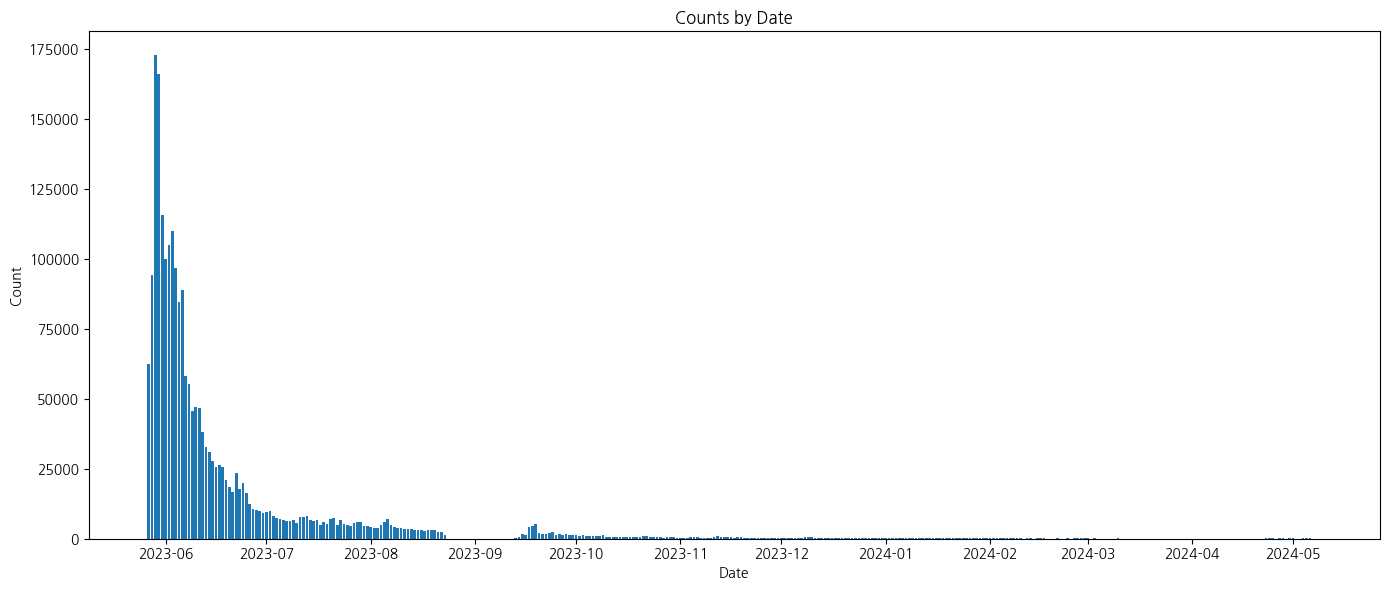

In [10]:
import matplotlib.dates as mdates

plt.figure(figsize=(14, 6))

plt.bar(df_counts['date'], df_counts['count'])

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())       # 월 단위 눈금
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Counts by Date')
plt.tight_layout()
plt.show()

In [11]:
# 리스트를 flatten 하기 이전, 2차원 구조를 유지하며 datetime 객체로 변환
lists_dates = [[parse(dt).date() for dt in sublist] for sublist in lists] 

In [12]:
# term: 날짜 간격 리스트
terms = [
    [(x[i+1] - x[i]).days for i in range(len(x)-1)] if len(x) >= 2 else []
    for x in lists_dates
]
persist = [
    (max(x) - min(x)).days if len(x) > 0 else 0 for x in lists_dates
]
# len: 리스트 길이
lengths = [len(x) for x in lists_dates]

# 결과 DataFrame 생성
new_df = pd.DataFrame({
    'user_id': accounts_attendance_df['user_id'],
    'term': terms,    
    'persist(days)': persist,
    'len': lengths
})

new_df['avg_term'] = new_df['term'].apply(lambda x: sum(x) / len(x) if x else 0).round(2)
display(new_df)

,user_id,term,persist(days),len,avg_term
0,1446852,"[1, 1, 1, 4, 3, 6, 3, 25, 21, 43, 2, 5]",115,13,9.58
1,1359398,"[2, 1, 3, 1, 2, 2, 1, 2, 1, 4, 1, 1, 1, 1, 1, ...",87,33,2.72
2,1501542,"[2, 1, 1, 1, 1, 4, 1, 7]",18,9,2.25
3,1507767,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",34,30,1.17
4,1287453,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",32,31,1.07
...,...,...,...,...,...
349632,897005,[],0,0,0.00
349633,1407059,[],0,1,0.00
349634,1583727,[],0,1,0.00
349635,1392372,[],0,1,0.00


In [13]:
new_df.describe()

,user_id,persist(days),len,avg_term
count,3.496370e+05,349637.000000,349637.000000,349637.000000
mean,1.247187e+06,25.356990,6.356098,5.417726
std,2.127986e+05,46.319985,9.158459,15.245151
min,8.321510e+05,0.000000,0.000000,0.000000
25%,1.065813e+06,0.000000,1.000000,0.000000
50%,1.261234e+06,7.000000,3.000000,1.570000
75%,1.437486e+06,26.000000,8.000000,3.800000
max,1.583730e+06,348.000000,310.000000,345.000000


In [32]:
new_df['term_max'] = new_df['term'].apply(lambda x: max(x) if x else 0)

In [34]:
new_df_max7 = new_df.loc[new_df['term_max'] <= 7]

In [37]:
new_df_max7.loc[(0 < new_df_max7['avg_term']) & (new_df_max7['avg_term'] <= 3)].describe()

,user_id,persist(days),len,avg_term,term_max
count,1.347920e+05,134792.000000,134792.000000,134792.000000,134792.000000
mean,1.286760e+06,9.403184,7.133035,1.629201,2.839033
std,2.039237e+05,9.463612,6.964738,0.579664,1.592963
min,8.323400e+05,1.000000,2.000000,1.000000,1.000000
25%,1.126290e+06,3.000000,3.000000,1.120000,2.000000
50%,1.326506e+06,7.000000,5.000000,1.500000,2.000000
75%,1.464773e+06,13.000000,9.000000,2.000000,4.000000
max,1.583669e+06,88.000000,88.000000,3.000000,7.000000


In [36]:
new_df.loc[(0 < new_df['avg_term']) & (new_df['avg_term'] <= 3)].describe()

,user_id,persist(days),len,avg_term,term_max
count,1.502370e+05,150237.000000,150237.000000,150237.000000,150237.000000
mean,1.284434e+06,13.414791,8.802485,1.702893,4.162849
std,2.043173e+05,19.850638,11.058522,0.607803,5.621299
min,8.323400e+05,1.000000,2.000000,1.000000,1.000000
25%,1.122604e+06,3.000000,3.000000,1.170000,2.000000
50%,1.322308e+06,8.000000,6.000000,1.570000,3.000000
75%,1.463415e+06,16.000000,10.000000,2.000000,4.000000
max,1.583669e+06,348.000000,310.000000,3.000000,160.000000


In [38]:
new_df_max7.loc[new_df_max7['avg_term'] > 3].describe()

,user_id,persist(days),len,avg_term,term_max
count,1.472700e+04,14727.000000,14727.000000,14727.000000,14727.000000
mean,1.210396e+06,8.095063,2.956475,4.545225,5.536905
std,2.076542e+05,4.824088,1.481542,1.111621,1.098246
min,8.334220e+05,4.000000,2.000000,3.060000,4.000000
25%,1.028838e+06,5.000000,2.000000,3.670000,5.000000
50%,1.212064e+06,7.000000,2.000000,4.000000,6.000000
75%,1.385716e+06,9.000000,3.000000,5.000000,6.000000
max,1.583632e+06,72.000000,20.000000,7.000000,7.000000


In [30]:
new_df.loc[new_df['avg_term'] > 3].describe()

,user_id,persist(days),len,avg_term
count,9.958800e+04,99588.000000,99588.000000,99588.000000
mean,1.214786e+06,68.786842,8.243975,16.451780
std,2.094380e+05,64.749406,8.135484,25.365914
min,8.330410e+05,4.000000,2.000000,3.010000
25%,1.035476e+06,21.000000,3.000000,4.600000
50%,1.209539e+06,51.000000,6.000000,7.670000
75%,1.392839e+06,110.000000,11.000000,16.670000
max,1.583632e+06,348.000000,108.000000,345.000000


In [14]:
over10attendance_user = new_df.loc[new_df['len'] >= 10,'user_id'].unique()

In [15]:
userwithdraw_df = ds.votes.accounts_userwithdraw()
userwithdraw_df.groupby('reason').size().sort_values(ascending=False).reset_index()

,reason,0
0,기타 이유,40301
1,함께 할 친구가 없어서,14450
2,재밌는 질문이 없어서,13133
3,버그가 너무 많아서,2031
4,구독료가 너무 비싸서,730
5,admin,61
6,test,53
7,기타,5


In [16]:
userwithdraw_df['month'] = userwithdraw_df['created_at'].dt.to_period('M')
withdraw_counts = userwithdraw_df.groupby('month').size().reset_index(name='withdraw_count')
withdraw_counts

,month,withdraw_count
0,2023-03,17
1,2023-04,2397
2,2023-05,44845
3,2023-06,9642
4,2023-07,4811
5,2023-08,2310
6,2023-09,2450
7,2023-10,1164
8,2023-11,837
9,2023-12,693


In [17]:
user_df = ds.votes.accounts_user()
user_df.head(6)

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0
5,832614,0,0,M,1048,"[838541, 833041, 832151, 837806, 1437874, 1142...",1,2023-03-29 12:56:35.064406,[],[],N,0,28,0,14,12.0


In [18]:
temp_df = user_df[['id','created_at']].copy()
temp_df['month'] = temp_df['created_at'].dt.to_period('M')
temp_df = temp_df.groupby('month').size().reset_index(name='register_count')
temp_df

,month,register_count
0,2023-03,33
1,2023-04,19060
2,2023-05,635505
3,2023-06,16737
4,2023-07,1849
5,2023-08,524
6,2023-09,605
7,2023-10,409
8,2023-11,731
9,2023-12,231


In [19]:
merged_df = pd.merge(temp_df, withdraw_counts, on='month', how='outer', suffixes=('_user', '_withdraw'))
merged_df['ratio(withdraw/register)'] = round(merged_df['withdraw_count'] / merged_df['register_count'],2)
try:
    merged_df['month'] = merged_df['month'].dt.to_timestamp()  # Period를 Timestamp로 변환
except:
    pass
display(merged_df)

,month,register_count,withdraw_count,ratio(withdraw/register)
0,2023-03-01,33,17,0.52
1,2023-04-01,19060,2397,0.13
2,2023-05-01,635505,44845,0.07
3,2023-06-01,16737,9642,0.58
4,2023-07-01,1849,4811,2.60
5,2023-08-01,524,2310,4.41
6,2023-09-01,605,2450,4.05
7,2023-10-01,409,1164,2.85
8,2023-11-01,731,837,1.15
9,2023-12-01,231,693,3.00


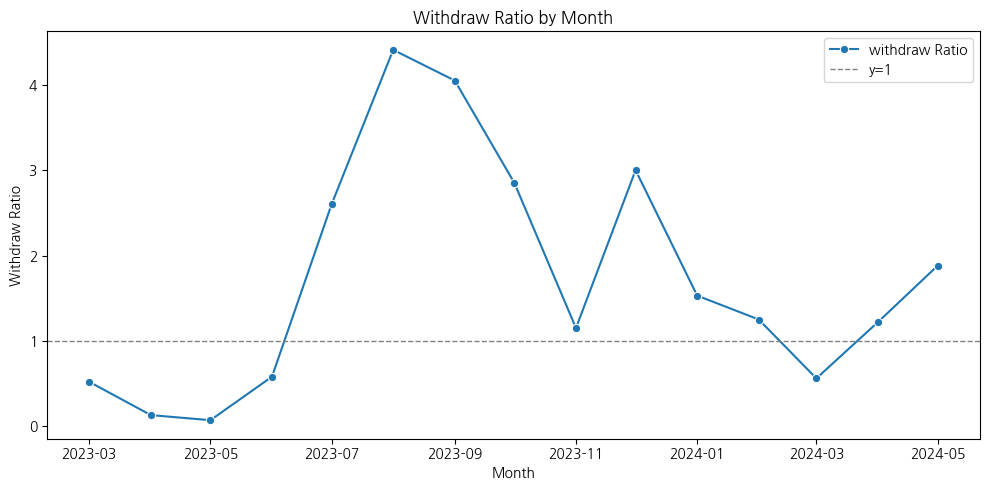

In [20]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=merged_df, x='month', y='ratio(withdraw/register)', marker='o', label='withdraw Ratio')

plt.xlabel('Month')
plt.ylabel('Withdraw Ratio')
plt.title('Withdraw Ratio by Month')
plt.axhline(y=1, color='gray', linestyle='--', linewidth=1, label='y=1')
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
user_df.loc[user_df['id'].isin(over10attendance_user)]

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
12,833041,0,0,F,885000006,"[841345, 982531, 838785, 882567, 832520, 87949...",1,2023-03-31 14:32:36.425315,[],[],N,1,8,0,0,149.0
21,833303,0,0,M,2579,"[879360, 1079314, 1038740, 969621, 1221654, 88...",0,2023-03-31 16:01:40.796317,[],[],N,0,0,0,0,44.0
32,833626,0,0,M,1291,"[863617, 857602, 858883, 858499, 856195, 86246...",1,2023-03-31 16:55:28.607220,[],[],N,0,0,0,1,113.0
44,834089,0,0,M,7495,"[833154, 866183, 845325, 850061, 844562, 84866...",1,2023-04-01 04:52:02.652307,[],[],N,0,0,0,16,42.0
46,834162,0,0,F,4781,"[1258753, 946819, 937991, 978443, 980241, 1527...",1,2023-04-01 11:26:23.269860,[],[],N,0,0,0,0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675528,1582176,0,0,F,1866,"[1582177, 1582178, 1582179, 1582278, 1551787, ...",1,2023-12-08 07:50:38.317104,[],[998862],N,0,4,0,0,67801.0
675532,1582180,0,0,M,4255,"[1560203, 1576980, 1549141, 1555637, 1353782, ...",1,2023-12-08 09:38:36.282814,[],[],N,0,0,0,0,84387.0
675798,1582446,0,0,F,1140,"[1576096, 991457, 1126819, 1444922, 1051557, 1...",1,2024-01-10 04:03:03.997491,[],[],N,0,0,0,0,20731.0
676601,1583249,0,0,F,2085,"[1583250, 1583252, 1583253, 1583256, 1583255, ...",1,2024-03-11 13:46:31.252435,[],[],N,0,9,0,0,43156.0


# Hackle Merging

In [3]:
ds.hackle.file_list()

['device_properties', 'hackle_events', 'hackle_properties', 'user_properties']

In [3]:
device_properties_df = ds.hackle.device_properties()
hackle_events_df = ds.hackle.hackle_events()
hackle_properties_df = ds.hackle.hackle_properties()
user_properties_df = ds.hackle.user_properties()


In [4]:
import numpy as np

# user_id 가 공백이거나 string인 경우 NAN으로 처리
hackle_properties_df['user_id'] = pd.to_numeric(hackle_properties_df['user_id'], errors='coerce')
# session_id와 user_id를 기준으로 정렬 (nan이 아닌 값이 위로 올라옴)
hackle_properties_df = hackle_properties_df.sort_values(['session_id','user_id'],ascending=True)
# session_id를 기준으로 중복 제거. (version_name을 살리기 어려움.)
hackle_properties_df = hackle_properties_df.drop_duplicates(subset=['session_id'], keep='first')

# user_id를 문자열 타입으로 재 변환 후, 공백인 경우 session id값 할당.
hackle_properties_df['user_id'] = hackle_properties_df['user_id'].where(
    hackle_properties_df['user_id'].notna(), 
    np.nan
).apply(lambda x: str(int(x)) if pd.notnull(x) else x)

hackle_properties_df['user_id'] = hackle_properties_df['user_id'].fillna(hackle_properties_df['session_id'])

                         

In [71]:
hackle_properties_df

,id,session_id,user_id,language,osname,osversion,versionname,device_id
431520,431521,000137bc-80de-4bb5-b61d-df7f217a4501,NaN,ko,Android,13,2.0.3,000137bc-80de-4bb5-b61d-df7f217a4501
16284,16285,00025EE1-BA46-4853-8FDD-B991FABA328F,1555160.0,ko-KR,iOS,16.5.1,2.0.5,00025EE1-BA46-4853-8FDD-B991FABA328F
284486,284487,00025EE1-BA46-4853-8FDD-B991FABA328F,1555160.0,ko-KR,iOS,16.5.1,2.0.3,00025EE1-BA46-4853-8FDD-B991FABA328F
493037,493038,00039F52-AC9A-4474-A645-DFE225C56753,NaN,ko-KR,iOS,16.6,2.0.5,00039F52-AC9A-4474-A645-DFE225C56753
467869,467870,0004482B-03B0-4638-8C5A-C2E49C085C7F,NaN,ko-KR,iOS,16.5.1,2.0.3,0004482B-03B0-4638-8C5A-C2E49C085C7F
...,...,...,...,...,...,...,...,...
169490,169491,zzwdcJbazOPmYWLKoUFQKhvZTRu1,NaN,ko-KR,iOS,16.5.1,2.0.3,C3DA2B91-C1B8-4113-8487-5B8C87E236DE
278802,278803,zzx2YLx97obWfJyKjGyXzmqQ97k2,1313497.0,ko-KR,iOS,16.5.1,2.0.5,EEDDB0D4-3945-4C06-99F9-5E51ADCF98CD
289873,289874,zzx2YLx97obWfJyKjGyXzmqQ97k2,NaN,ko-KR,iOS,16.5.1,2.0.5,EEDDB0D4-3945-4C06-99F9-5E51ADCF98CD
264239,264240,zzzPTZp5ttgt5M0gs6R5B4NNKbC3,1409071.0,ko-KR,iOS,16.5.1,2.0.5,0E1B7E8A-9E8D-418F-A010-E973CEAA703C


In [64]:
hackle_properties_df.loc[hackle_properties_df['session_id']=='000137bc-80de-4bb5-b61d-df7f217a4501']

,id,session_id,user_id,language,osname,osversion,versionname,device_id
431520,431521,000137bc-80de-4bb5-b61d-df7f217a4501,NaN,ko,Android,13,2.0.3,000137bc-80de-4bb5-b61d-df7f217a4501


In [ ]:
hackle_properties_df = hackle_properties_df.drop_duplicates(subset=['session_id'], keep='first')

,id,session_id,user_id,language,osname,osversion,versionname,device_id
431520,431521,000137bc-80de-4bb5-b61d-df7f217a4501,NaN,ko,Android,13,2.0.3,000137bc-80de-4bb5-b61d-df7f217a4501
16284,16285,00025EE1-BA46-4853-8FDD-B991FABA328F,1555160.0,ko-KR,iOS,16.5.1,2.0.5,00025EE1-BA46-4853-8FDD-B991FABA328F
493037,493038,00039F52-AC9A-4474-A645-DFE225C56753,NaN,ko-KR,iOS,16.6,2.0.5,00039F52-AC9A-4474-A645-DFE225C56753
467869,467870,0004482B-03B0-4638-8C5A-C2E49C085C7F,NaN,ko-KR,iOS,16.5.1,2.0.3,0004482B-03B0-4638-8C5A-C2E49C085C7F
136925,136926,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,1189864.0,ko-KR,iOS,16.5.1,2.0.5,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD
282097,282098,00057831-A672-4163-9C02-AB920A371F2C,1548609.0,ko-KR,iOS,16.1.2,2.0.5,00057831-A672-4163-9C02-AB920A371F2C
94110,94111,000638C3-2BC2-4068-A482-861B526B2651,860893.0,ko-KR,iOS,16.5.1,2.0.5,000638C3-2BC2-4068-A482-861B526B2651
102545,102546,00077002-3194-4c04-8ce0-2945041865f2,1206735.0,ko,Android,13,2.0.3,00077002-3194-4c04-8ce0-2945041865f2
523917,523918,0009B464-970A-4030-9990-C28F90D4D0D8,NaN,ko-KR,iOS,16.5.1,2.0.5,0009B464-970A-4030-9990-C28F90D4D0D8
144444,144445,000C66B7-BD0A-4238-9560-A86E4A3A60A4,1457308.0,ko-KR,iOS,16.5.1,2.0.5,000C66B7-BD0A-4238-9560-A86E4A3A60A4


In [35]:
merged_df.loc[merged_df.duplicated(subset=['session_id'],keep=False)].sort_values('session_id')

,device_id,device_model,device_vendor,session_id,user_id,language,osname,osversion,versionname
9,00025EE1-BA46-4853-8FDD-B991FABA328F,"iPhone12,8",Apple,00025EE1-BA46-4853-8FDD-B991FABA328F,1555160,ko-KR,iOS,16.5.1,2.0.5
10,00025EE1-BA46-4853-8FDD-B991FABA328F,"iPhone12,8",Apple,00025EE1-BA46-4853-8FDD-B991FABA328F,1555160,ko-KR,iOS,16.5.1,2.0.3
17,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,"iPhone14,4",Apple,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,BZulJkzkd5O2AfSkIzDXzJgPxbu2,ko-KR,iOS,16.5.1,1.2.15
16,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,"iPhone14,4",Apple,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,BZulJkzkd5O2AfSkIzDXzJgPxbu2,ko-KR,iOS,16.5.1,2.0.5
15,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,"iPhone14,4",Apple,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,1189864,ko-KR,iOS,16.5.1,2.0.5
...,...,...,...,...,...,...,...,...,...
403105,C3DA2B91-C1B8-4113-8487-5B8C87E236DE,"iPhone14,7",Apple,zzwdcJbazOPmYWLKoUFQKhvZTRu1,,ko-KR,iOS,16.5.1,2.0.3
491966,EEDDB0D4-3945-4C06-99F9-5E51ADCF98CD,"iPhone14,7",Apple,zzx2YLx97obWfJyKjGyXzmqQ97k2,,ko-KR,iOS,16.5.1,2.0.5
491965,EEDDB0D4-3945-4C06-99F9-5E51ADCF98CD,"iPhone14,7",Apple,zzx2YLx97obWfJyKjGyXzmqQ97k2,1313497,ko-KR,iOS,16.5.1,2.0.5
29076,0E1B7E8A-9E8D-418F-A010-E973CEAA703C,"iPhone13,1",Apple,zzzPTZp5ttgt5M0gs6R5B4NNKbC3,zzzPTZp5ttgt5M0gs6R5B4NNKbC3,ko-KR,iOS,16.5.1,2.0.5


In [ ]:
merged_df.isna().sum()

device_id        0
device_model     0
device_vendor    0
session_id       0
user_id          0
language         0
osname           0
osversion        0
versionname      0
dtype: int64

In [27]:
hackle_events_df

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,00000533-3f1c-4b3b-81f1-0c8f35754b4e,,,NaN,NaN,NaN,NaN
1,00000716-27e9-4e72-a602-d0ce61784b06,2023-07-18 21:07:24,click_question_open,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,00000716-27e9-4e72-a602-d0ce61784b06,,,64.0,436.0,4830.0,NaN
2,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,2023-08-06 20:18:03,click_bottom_navigation_profile,6bcea65d-9f40-46fc-888c-700fe707483f,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,,,26.0,174.0,4729.0,NaN
3,00000981-5e2a-4111-993e-4f1891ad9a53,2023-08-05 01:46:10,view_shop,XVYNT6zfhFWqIg9omwg2AHDjTLx2,00000981-5e2a-4111-993e-4f1891ad9a53,,,61.0,44.0,142.0,NaN
4,00000a7a-ba72-4332-b4a9-7910670aaeb2,2023-07-24 15:03:37,click_bottom_navigation_lab,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,00000a7a-ba72-4332-b4a9-7910670aaeb2,,,119.0,545.0,3287.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11441314,fffff54e-e730-418f-8080-4eff7e2641f2,2023-08-08 01:40:00,view_timeline_tap,n9RSY5wNfvURIV3sKeXZiYWiVSD3,fffff54e-e730-418f-8080-4eff7e2641f2,,,27.0,92.0,326.0,NaN
11441315,fffff57d-6c79-46b3-a87b-4bfa900ef11b,2023-07-23 09:30:22,skip_question,CB3F11FD-4B78-4496-96E7-3B4174C123E9,fffff57d-6c79-46b3-a87b-4bfa900ef11b,,,0.0,0.0,300.0,799.0
11441316,fffff632-2d70-4190-addd-6ae2f2399876,2023-07-18 18:13:30,view_lab_tap,AwpRr0ll7bTfFV22MIXHDASEpz72,fffff632-2d70-4190-addd-6ae2f2399876,,,29.0,97.0,284.0,NaN
11441317,fffffb07-af2f-4cce-a26e-1dcc97c74b14,2023-07-21 15:37:27,view_timeline_tap,H8oiWwKxRiYByNykbb2GsVYd8JU2,fffffb07-af2f-4cce-a26e-1dcc97c74b14,,,49.0,527.0,932.0,NaN


In [24]:
user_properties_df

,user_id,class,gender,grade,school_id
0,1000000,1,M,1,1885
1,1000009,10,F,2,3869
2,1000012,10,F,1,5091
3,1000013,8,F,2,1743
4,1000015,2,F,3,5078
...,...,...,...,...,...
230814,999992,1,M,2,2240
230815,999996,5,M,2,365
230816,999997,2,M,3,2502
230817,nhj4wh46MAf5K0IHDu4DGyRsdWn2,5,F,2,3499


In [15]:
device_properties_df.device_id.nunique()

251720

In [23]:
device_properties_df.loc[device_properties_df.duplicated(subset='device_id',keep='last')].sort_values('device_id')

,id,device_id,device_model,device_vendor
16,17,0006bed8-512b-48f9-9b33-f79bb1e225a8,SM-A325N,samsung
704,705,00bf3a4e-4ef9-4a6a-8558-cc5f68d4041d,SM-A546S,samsung
1718,1719,01BBBADC-073C-4AEC-8C00-52F0A29577B4,"iPhone12,8",Apple
1824,1825,01D2DB25-5EF6-447C-B3FA-63156C4DCBCF,"iPhone12,1",Apple
2134,2135,021fd2a9-a0e5-42e8-b9d1-0c2244101869,SM-A315N,samsung
...,...,...,...,...
248299,248300,fbd26b17-5135-4ea4-85ad-b245aa4a811b,SM-G977N,samsung
249406,249407,fce4ff32-a463-4b63-abcf-97bcbd54ae21,SM-A305N,samsung
250541,250542,fe135415-8a57-44da-91e6-2b2ac0c4ee61,SM-A546S,samsung
250798,250799,fe599a47-85ad-467b-b3e5-ec557117ec80,SM-G986N,samsung


In [83]:
hackle_events_df.sort_values(['session_id','event_datetime'], ascending=True)

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
3947333,584085d4-95a9-47e4-a00b-070c433d0996,2023-07-21 14:23:33,launch_app,000137bc-80de-4bb5-b61d-df7f217a4501,584085d4-95a9-47e4-a00b-070c433d0996,,,NaN,NaN,NaN,NaN
7704495,ac63bbaa-a96e-49ce-8980-878fa1cb50de,2023-07-21 14:23:33,$session_start,000137bc-80de-4bb5-b61d-df7f217a4501,ac63bbaa-a96e-49ce-8980-878fa1cb50de,,,NaN,NaN,NaN,NaN
1183374,1a7d09d7-8760-4c01-9e47-532c3bd93d7c,2023-07-22 23:30:09,launch_app,00025EE1-BA46-4853-8FDD-B991FABA328F,1a7d09d7-8760-4c01-9e47-532c3bd93d7c,,,52.0,68.0,210.0,NaN
10047160,e0c8259f-c343-4c3c-bf29-d3f9f57bb01b,2023-07-22 23:30:09,$session_start,00025EE1-BA46-4853-8FDD-B991FABA328F,e0c8259f-c343-4c3c-bf29-d3f9f57bb01b,,,52.0,68.0,210.0,NaN
513832,0b7e4def-fb8d-4435-be8e-ad1124666734,2023-07-22 23:30:31,launch_app,00025EE1-BA46-4853-8FDD-B991FABA328F,0b7e4def-fb8d-4435-be8e-ad1124666734,,,52.0,68.0,210.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6387648,8edf4885-785a-43fc-87da-9f1982dacea9,2023-07-28 22:35:31,view_questions_tap,zzzPTZp5ttgt5M0gs6R5B4NNKbC3,8edf4885-785a-43fc-87da-9f1982dacea9,,,80.0,487.0,1481.0,NaN
9368131,d196db66-dab1-4934-8824-e337050e0a46,2023-07-28 22:35:31,view_timeline_tap,zzzPTZp5ttgt5M0gs6R5B4NNKbC3,d196db66-dab1-4934-8824-e337050e0a46,,,80.0,487.0,1481.0,NaN
11055065,f7586f79-83a3-4784-bb64-7139360a6522,2023-07-28 22:35:32,click_bottom_navigation_questions,zzzPTZp5ttgt5M0gs6R5B4NNKbC3,f7586f79-83a3-4784-bb64-7139360a6522,,,80.0,487.0,1481.0,NaN
1803608,285a27a5-02cd-4bbb-9172-dcd67158e466,2023-07-28 22:35:35,click_bottom_navigation_timeline,zzzPTZp5ttgt5M0gs6R5B4NNKbC3,285a27a5-02cd-4bbb-9172-dcd67158e466,,,80.0,487.0,1481.0,NaN


In [5]:
merged_df = pd.merge(device_properties_df.drop(columns=['id']), hackle_properties_df.drop(columns=['id']), on='device_id', how='outer')
# 한 개의 device_id에 대해 2개의 device_model을 가진 경우가 존재 (1320건 = 660개) 그로 인해, merge할 때 일부 행에 중복 발생.

merged_df = pd.merge(merged_df, user_properties_df, on='user_id', how='left')
# user_id 가 공백이거나 string 형태가 되어 있는 경우는 Nan값 발생

merged_df = pd.merge(hackle_events_df.drop(columns=['id']), merged_df, on='session_id', how='left')

merged_df['event_id'] = merged_df['event_id'].astype('category').cat.codes.astype('int32')
merged_df['session_id'] = merged_df['session_id'].astype('category').cat.codes.astype('int32')

merged_df.to_parquet(
    "gs://final-project-soomin/final_project/hackle/merged_hackle.parquet",
    engine="pyarrow",
    storage_options={"token": JSON_KEY_PATH},
)

In [7]:
merged_df = pd.read_parquet(
    path = "gs://final-project-soomin/final_project/hackle/merged_hackle.parquet",
    engine="pyarrow",
    storage_options={"token": JSON_KEY_PATH}
)

In [9]:
hackle_events_df

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,00000533-3f1c-4b3b-81f1-0c8f35754b4e,,,NaN,NaN,NaN,NaN
1,00000716-27e9-4e72-a602-d0ce61784b06,2023-07-18 21:07:24,click_question_open,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,00000716-27e9-4e72-a602-d0ce61784b06,,,64.0,436.0,4830.0,NaN
2,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,2023-08-06 20:18:03,click_bottom_navigation_profile,6bcea65d-9f40-46fc-888c-700fe707483f,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,,,26.0,174.0,4729.0,NaN
3,00000981-5e2a-4111-993e-4f1891ad9a53,2023-08-05 01:46:10,view_shop,XVYNT6zfhFWqIg9omwg2AHDjTLx2,00000981-5e2a-4111-993e-4f1891ad9a53,,,61.0,44.0,142.0,NaN
4,00000a7a-ba72-4332-b4a9-7910670aaeb2,2023-07-24 15:03:37,click_bottom_navigation_lab,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,00000a7a-ba72-4332-b4a9-7910670aaeb2,,,119.0,545.0,3287.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11441314,fffff54e-e730-418f-8080-4eff7e2641f2,2023-08-08 01:40:00,view_timeline_tap,n9RSY5wNfvURIV3sKeXZiYWiVSD3,fffff54e-e730-418f-8080-4eff7e2641f2,,,27.0,92.0,326.0,NaN
11441315,fffff57d-6c79-46b3-a87b-4bfa900ef11b,2023-07-23 09:30:22,skip_question,CB3F11FD-4B78-4496-96E7-3B4174C123E9,fffff57d-6c79-46b3-a87b-4bfa900ef11b,,,0.0,0.0,300.0,799.0
11441316,fffff632-2d70-4190-addd-6ae2f2399876,2023-07-18 18:13:30,view_lab_tap,AwpRr0ll7bTfFV22MIXHDASEpz72,fffff632-2d70-4190-addd-6ae2f2399876,,,29.0,97.0,284.0,NaN
11441317,fffffb07-af2f-4cce-a26e-1dcc97c74b14,2023-07-21 15:37:27,view_timeline_tap,H8oiWwKxRiYByNykbb2GsVYd8JU2,fffffb07-af2f-4cce-a26e-1dcc97c74b14,,,49.0,527.0,932.0,NaN


In [10]:
merged_df

,event_id,event_datetime,event_key,session_id,item_name,page_name,friend_count,votes_count,heart_balance,question_id,...,device_vendor,user_id,language,osname,osversion,versionname,class,gender,grade,school_id
0,0,2023-07-18 19:40:17,$session_start,31496,,,NaN,NaN,NaN,NaN,...,Apple,1041414,ko-KR,iOS,16.0,2.0.5,9.0,F,2.0,2173.0
1,1,2023-07-18 21:07:24,click_question_open,58873,,,64.0,436.0,4830.0,NaN,...,Apple,1046711,ko-KR,iOS,16.5.1,2.0.3,2.0,F,2.0,1737.0
2,2,2023-08-06 20:18:03,click_bottom_navigation_profile,45897,,,26.0,174.0,4729.0,NaN,...,samsung,1545130,ko,Android,13,2.0.5,2.0,M,1.0,1141.0
3,3,2023-08-05 01:46:10,view_shop,155122,,,61.0,44.0,142.0,NaN,...,samsung,1224793,ko,Android,13,2.0.5,6.0,F,3.0,1824.0
4,4,2023-07-24 15:03:37,click_bottom_navigation_lab,154274,,,119.0,545.0,3287.0,NaN,...,Apple,1329450,ko-US,iOS,16.5.1,2.0.5,6.0,F,3.0,187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11507961,11441314,2023-08-08 01:40:00,view_timeline_tap,213165,,,27.0,92.0,326.0,NaN,...,Apple,1429242,ko-KR,iOS,16.5.1,2.0.5,1.0,F,2.0,5669.0
11507962,11441315,2023-07-23 09:30:22,skip_question,80793,,,0.0,0.0,300.0,799.0,...,Apple,1579284,ko-KR,iOS,16.2,2.0.5,4.0,F,2.0,2022.0
11507963,11441316,2023-07-18 18:13:30,view_lab_tap,73189,,,29.0,97.0,284.0,NaN,...,Apple,1221309,ko-US,iOS,16.5.1,2.0.5,2.0,M,3.0,5519.0
11507964,11441317,2023-07-21 15:37:27,view_timeline_tap,103772,,,49.0,527.0,932.0,NaN,...,Apple,1010695,ko-KR,iOS,16.5.1,2.0.3,6.0,M,2.0,4742.0


In [4]:
merged_df = pd.read_parquet(
    path="gs://final-project-soomin/final_project/hackle/merged_hackle.parquet",
    engine='pyarrow',
    storage_options = {"token": JSON_KEY_PATH}
)

In [6]:
hackle_events_df = ds.hackle.hackle_events()


In [8]:
hackle_events_df

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,00000533-3f1c-4b3b-81f1-0c8f35754b4e,,,NaN,NaN,NaN,NaN
1,00000716-27e9-4e72-a602-d0ce61784b06,2023-07-18 21:07:24,click_question_open,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,00000716-27e9-4e72-a602-d0ce61784b06,,,64.0,436.0,4830.0,NaN
2,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,2023-08-06 20:18:03,click_bottom_navigation_profile,6bcea65d-9f40-46fc-888c-700fe707483f,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,,,26.0,174.0,4729.0,NaN
3,00000981-5e2a-4111-993e-4f1891ad9a53,2023-08-05 01:46:10,view_shop,XVYNT6zfhFWqIg9omwg2AHDjTLx2,00000981-5e2a-4111-993e-4f1891ad9a53,,,61.0,44.0,142.0,NaN
4,00000a7a-ba72-4332-b4a9-7910670aaeb2,2023-07-24 15:03:37,click_bottom_navigation_lab,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,00000a7a-ba72-4332-b4a9-7910670aaeb2,,,119.0,545.0,3287.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11441314,fffff54e-e730-418f-8080-4eff7e2641f2,2023-08-08 01:40:00,view_timeline_tap,n9RSY5wNfvURIV3sKeXZiYWiVSD3,fffff54e-e730-418f-8080-4eff7e2641f2,,,27.0,92.0,326.0,NaN
11441315,fffff57d-6c79-46b3-a87b-4bfa900ef11b,2023-07-23 09:30:22,skip_question,CB3F11FD-4B78-4496-96E7-3B4174C123E9,fffff57d-6c79-46b3-a87b-4bfa900ef11b,,,0.0,0.0,300.0,799.0
11441316,fffff632-2d70-4190-addd-6ae2f2399876,2023-07-18 18:13:30,view_lab_tap,AwpRr0ll7bTfFV22MIXHDASEpz72,fffff632-2d70-4190-addd-6ae2f2399876,,,29.0,97.0,284.0,NaN
11441317,fffffb07-af2f-4cce-a26e-1dcc97c74b14,2023-07-21 15:37:27,view_timeline_tap,H8oiWwKxRiYByNykbb2GsVYd8JU2,fffffb07-af2f-4cce-a26e-1dcc97c74b14,,,49.0,527.0,932.0,NaN


# HACKLE ALL DATES


In [3]:
basepath = 'gs://final-project-soomin/final_project/additional_hackle'
storage_options = {'token':JSON_KEY_PATH}
columns = ["event_key", "session_id", "user_id","hackle_properties","event_properties"]
time_col =['Asia/Seoul','event_key','session_id']

## 03-31

In [ ]:
hackle_df = pd.read_json(
    path_or_buf = f'{basepath}/2023-03-31.json',
    storage_options = storage_options
)
dr.hackle_baseinfo(hackle_df)

,Asia/Seoul,id,event_key,session_id,device_id,user_id,value,user_properties,hackle_properties,event_properties
0,2023-04-01T00:00:40.413Z,2bcd2024-8b93-4acc-93cc-5b6b11a4bd14,$session_start,1b139b39-febb-4c08-a630-16ee3b640815,1b139b39-febb-4c08-a630-16ee3b640815,NaN,0,{},"{'language': 'ko', 'isapp': 'true', 'osversion...",{'sessionid': '1680274840413.bcf9decc'}
1,2023-04-01T00:00:41.234Z,84fd4bf3-e52a-4e31-962f-86abc5e49c8d,button,1b139b39-febb-4c08-a630-16ee3b640815,1b139b39-febb-4c08-a630-16ee3b640815,NaN,0,{},"{'language': 'ko', 'isapp': 'true', 'osversion...","{'description': '내 학교 찾아보기', 'location': 'sign..."
2,2023-04-01T00:00:53.630Z,66c70ee6-562f-4efa-b180-e0b5e788e6de,$session_start,08a0293d-f6c0-4900-901e-436a503da924,08a0293d-f6c0-4900-901e-436a503da924,NaN,0,{},"{'language': 'ko', 'isapp': 'true', 'osversion...",{'sessionid': '1680274853630.42b82ff5'}
3,2023-04-01T00:00:53.966Z,dbba13cc-1568-4679-9b20-90649ef0ddeb,button,1b139b39-febb-4c08-a630-16ee3b640815,1b139b39-febb-4c08-a630-16ee3b640815,NaN,0,{},"{'language': 'ko', 'isapp': 'true', 'osversion...","{'description': '앱바 뒤로가기', 'location': 'signsc..."
4,2023-04-01T00:00:54.520Z,924509bd-3577-46aa-913f-4c9a8b7f3e90,button,08a0293d-f6c0-4900-901e-436a503da924,08a0293d-f6c0-4900-901e-436a503da924,NaN,0,{},"{'language': 'ko', 'isapp': 'true', 'osversion...","{'description': '내 학교 찾아보기', 'location': 'sign..."
5,2023-04-01T00:01:05.957Z,0ae1742d-05a1-437c-a206-c4f134307932,button,1b139b39-febb-4c08-a630-16ee3b640815,1b139b39-febb-4c08-a630-16ee3b640815,NaN,0,{},"{'language': 'ko', 'isapp': 'true', 'osversion...","{'description': '내 학교 찾아보기', 'location': 'sign..."


(11558, 10)
------------------------------

Event_key
3 ['$session_start' 'button' '$session_end']

user_id
0 [nan]


## 04-06

In [ ]:
hackle_df = pd.read_json(
    path_or_buf = f'{basepath}/2023-04-06.json',
    storage_options = storage_options
)
dr.hackle_baseinfo(hackle_df)

,Asia/Seoul,id,event_key,session_id,device_id,user_id,value,user_properties,hackle_properties,event_properties
0,2023-04-07T00:31:16.409Z,3d109e0e-d21f-413d-bab4-774ae3299a0e,button,56F905CC-7B62-41D6-9FD0-28A1DB7325BF,56F905CC-7B62-41D6-9FD0-28A1DB7325BF,NaN,0,{},"{'language': 'en-KR', 'isapp': 'true', 'osvers...","{'description': '내 학교 찾아보기', 'location': 'sign..."
1,2023-04-07T00:31:19.399Z,965a15d1-cdee-4ab3-bebb-8a9616323472,$session_start,56F905CC-7B62-41D6-9FD0-28A1DB7325BF,56F905CC-7B62-41D6-9FD0-28A1DB7325BF,NaN,0,{},"{'language': 'en-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1680795079399.0cf42a02'}
2,2023-04-07T00:31:28.353Z,aa50a2ad-2349-4224-8845-e4f30e523c19,button,56F905CC-7B62-41D6-9FD0-28A1DB7325BF,56F905CC-7B62-41D6-9FD0-28A1DB7325BF,NaN,0,{},"{'language': 'en-KR', 'isapp': 'true', 'osvers...","{'description': '학교 선택', 'location': 'signscho..."
3,2023-04-07T00:31:32.028Z,b34fef75-46c0-4986-afdc-c751c46835dd,button,56F905CC-7B62-41D6-9FD0-28A1DB7325BF,56F905CC-7B62-41D6-9FD0-28A1DB7325BF,NaN,0,{},"{'language': 'en-KR', 'isapp': 'true', 'osvers...","{'description': '학교 선택', 'location': 'signscho..."
4,2023-04-07T00:31:34.900Z,f4e865f2-e50f-411c-9f4b-1322c5edd22a,button,56F905CC-7B62-41D6-9FD0-28A1DB7325BF,56F905CC-7B62-41D6-9FD0-28A1DB7325BF,NaN,0,{},"{'language': 'en-KR', 'isapp': 'true', 'osvers...","{'description': '학교 선택', 'location': 'signscho..."
5,2023-04-07T00:31:41.615Z,41c591aa-008a-487e-b0dc-5fb0556a1efc,button,56F905CC-7B62-41D6-9FD0-28A1DB7325BF,56F905CC-7B62-41D6-9FD0-28A1DB7325BF,NaN,0,{},"{'language': 'en-KR', 'isapp': 'true', 'osvers...","{'description': '자동으로 친구추가', 'location': 'sign..."


(4266, 10)
------------------------------

Event_key
3 ['button' '$session_start' '$session_end']

user_id
0 [nan]


## 04-12

In [ ]:
hackle_df = pd.read_json(
    path_or_buf = f'{basepath}/2023-04-12.json',
    storage_options = storage_options
    
)
dr.hackle_baseinfo(hackle_df)

,Asia/Seoul,id,event_key,session_id,device_id,user_id,value,user_properties,hackle_properties,event_properties
0,2023-04-13T00:01:23.365Z,58d1dda4-ddad-438c-beb4-1f2772ed96d1,button,d3PU5u3G3JM0v7wnCwbKgdALdMu1,389A3E2B-567C-432B-9DC4-A1C658523A4B,NaN,0,{},"{'language': 'ko-KR', 'isapp': 'true', 'osvers...","{'description': 'votes', 'location': 'homeidle..."
1,2023-04-13T00:01:28.975Z,6016d6a6-05aa-44f6-8986-516c7d2b06f9,button,d3PU5u3G3JM0v7wnCwbKgdALdMu1,389A3E2B-567C-432B-9DC4-A1C658523A4B,NaN,0,{},"{'language': 'ko-KR', 'isapp': 'true', 'osvers...","{'description': 'vote 선택', 'location': 'homevo..."
2,2023-04-13T00:01:39.696Z,4bf27c3d-be52-41a1-8567-375390a8560e,button,d3PU5u3G3JM0v7wnCwbKgdALdMu1,389A3E2B-567C-432B-9DC4-A1C658523A4B,NaN,0,{},"{'language': 'ko-KR', 'isapp': 'true', 'osvers...","{'description': '앱바 뒤로가기', 'location': 'homede..."
3,2023-04-13T00:01:43.163Z,dc2b4274-ea1d-4f7e-86dc-7a4e08a20943,$session_end,d3PU5u3G3JM0v7wnCwbKgdALdMu1,389A3E2B-567C-432B-9DC4-A1C658523A4B,NaN,0,{},"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1681309827073.744c6f43'}
4,2023-04-13T00:08:46.590Z,75b157cf-a658-4166-aee8-f132867f5d56,button,1D41FA5A-BCBC-4C79-A236-8606FB140E25,1D41FA5A-BCBC-4C79-A236-8606FB140E25,NaN,0,{},"{'language': 'ko-KR', 'isapp': 'true', 'osvers...","{'description': '내 학교 찾아보기', 'location': 'sign..."
5,2023-04-13T00:14:46.723Z,5e7b1b2a-d4f6-49d7-9738-c0f42e0be0e2,$session_start,Q1RD3cvj0oVD7qi172VXIHPWvve2,9A99229B-6FC0-4092-9B38-C8F56A61621D,NaN,0,{},"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1681312486723.81eebc37'}


(4488, 10)
------------------------------

Event_key
3 ['button' '$session_end' '$session_start']

user_id
0 [nan]


## 04-18 *1.9gb 생략

In [ ]:
# hackle_df = pd.read_json(
#     path_or_buf = f'{basepath}/2023-04-18.json',
#     storage_options = storage_options
# )
# dr.hackle_baseinfo(hackle_df)

## 04-24 *5.2gb 생략

In [ ]:
# hackle_df = pd.read_json(
#     path_or_buf = f'{basepath}/2023-04-24.json',
#     storage_options = storage_options
# )
# dr.hackle_baseinfo(hackle_df)

## 04-30

In [ ]:
hackle_df = pd.read_parquet(
    path = f'{basepath}/2023-04-30.parquet',
    engine = 'pyarrow',
    storage_options= storage_options
)
dr.hackle_baseinfo(hackle_df)

,Asia/Seoul,event_key,session_id,user_id,value,user_properties,hackle_properties,event_properties,id,device_id
0,2023-05-01T00:00:00.024Z,button,jgGFnoyc6GWuGIEgjp3nUoKRQbF3,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...","{'description': '다음', 'location': 'signotherin...",96d1336f-744b-4deb-a6a4-207494419dbf,cfc34eab-6930-488b-8109-70d37cec7dae
1,2023-05-01T00:00:00.025Z,button,n3PI8GZnRFOKpJslIRgckMeRiln1,None,0.0,[],"{'language': 'ko-CA', 'isapp': 'true', 'osvers...","{'description': 'vote 선택', 'location': 'homevo...",2825d1b1-8325-42e2-88eb-8cae61d3a26d,0dde2ecb-ff03-440f-98f3-94f20978b796
2,2023-05-01T00:00:00.029Z,button,L31Dl8vRtdWPJ8XC0gGs1mPwzJH2,None,0.0,[],"{'language': 'ko', 'isapp': 'true', 'osversion...","{'description': '친구선택', 'location': 'homeenque...",335b0a36-9ecf-41a9-b7d2-e27125e521ef,b50774ed-24ce-49e1-9383-945ff3aea9ff
3,2023-05-01T00:00:00.036Z,button,QjToElcYNkVxszJDHBhqtITlzDJ3,None,0.0,[],"{'language': 'ko', 'isapp': 'true', 'osversion...","{'description': '이름 셔플!', 'location': 'homeenq...",b730bb6a-589a-4074-89a1-87f11a03f9d6,0999c6b6-c579-4c0f-916c-9a113010f84a
4,2023-05-01T00:00:00.063Z,button,VRpXf303RGU730fIO4EjWstzAJi1,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...","{'description': '앱바 뒤로가기', 'location': 'homefr...",c2a5fd3f-92d5-4864-8e0e-63e563898499,45985493-ed35-4cc5-935f-1bcf922e213c
5,2023-05-01T00:00:00.076Z,button,k6DWD3Cr8ie66v49KtePvELXqXs2,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...","{'description': 'votes', 'location': 'homescre...",11922e50-e015-4d81-850a-706987ebbb20,3c45d794-0474-4146-adf2-b7cd6bd4a3dc


(8588422, 10)
------------------------------

Event_key
3 ['button' '$session_end' '$session_start']

user_id
0 [None]


## 05-06

In [ ]:
hackle_df = pd.read_parquet(
    path = f'{basepath}/2023-05-06.parquet',
    engine = 'pyarrow',
    storage_options= storage_options,
    columns=['Asia/Seoul','event_key','session_id']
)
dr.hackle_baseinfo(hackle_df)

,Asia/Seoul,event_key,session_id
0,2023-05-07T00:00:00.014Z,$session_end,OoWMTpTWpUa4m8I1RiKOk75Xnvs1
1,2023-05-07T00:00:00.159Z,$session_end,CrFi87nvwiVvHExxP9uSfIHOmBy1
2,2023-05-07T00:00:00.244Z,$session_end,W6frWgWJtbWTJwdm6eVWPGKwY2Y2
3,2023-05-07T00:00:00.255Z,$session_start,4EFB4D45-0AAF-424A-8E4E-2F19249C8892
4,2023-05-07T00:00:00.316Z,$session_start,JdxVFvtz6AcxxOZVvl6plHayjYJ3
5,2023-05-07T00:00:00.600Z,$session_start,cwkjz24nDvQLqBcf4nyymRSaGpn1


(7106588, 3)
------------------------------

Event_key
2 ['$session_end' '$session_start']

user_id
There is no "user_id" column.


## 05-12

In [4]:
hackle_df = pd.read_parquet(
    path = f'{basepath}/2023-05-12.parquet',
    engine = 'pyarrow',
    storage_options= storage_options,
    columns=time_col
)
dr.hackle_baseinfo(hackle_df)

,Asia/Seoul,event_key,session_id
0,2023-05-13T00:00:00.004Z,$session_start,6zkImM4PD0MHIbJ9zRVXs6vX6e62
1,2023-05-13T00:00:00.027Z,$session_end,Sq5vui6fg2Nhz2EHeC8e4PWyxo13
2,2023-05-13T00:00:00.027Z,$session_end,RyWeiMNMACUhbawb63ITBMX1c1U2
3,2023-05-13T00:00:00.046Z,$session_start,3OaNLuqTVDTkMEc8IsZNBxF9hsH2
4,2023-05-13T00:00:00.070Z,$session_end,rWBKAsEaG3cpHuAPRyohFr3k6PB2
5,2023-05-13T00:00:00.071Z,$session_end,na1MHdaSs5dh4jdK79Ikrvmfbr53


(12188804, 3)
------------------------------

Event_key
2 ['$session_start' '$session_end']

user_id
There is no "user_id" column.


## 05-18

In [6]:
hackle_df = pd.read_parquet(
    path = f'{basepath}/2023-05-18.parquet',
    engine = 'pyarrow',
    storage_options= storage_options,
    columns=time_col
)
dr.hackle_baseinfo(hackle_df)

,Asia/Seoul,event_key,session_id
0,2023-05-19T00:00:00.033Z,$session_start,nALWgF7izudSzKXArsiAOaYYsr23
1,2023-05-19T00:00:00.038Z,$session_end,E9A0131C-A70A-4917-88D8-257223F0A767
2,2023-05-19T00:00:00.068Z,$session_start,euhK4oLwdGPVT6sPNNN1Rs7xEKz1
3,2023-05-19T00:00:00.087Z,$session_start,TYAFQPAWozbqfQ3I296QuXJnWrx1
4,2023-05-19T00:00:00.102Z,$session_start,XhhuxAQvEcXdlD1JjbPC8H3AF602
5,2023-05-19T00:00:00.114Z,$session_end,6CPdsmM3GNQmRMgXRKATreI8c4Y2


(8224556, 3)
------------------------------

Event_key
2 ['$session_start' '$session_end']

user_id
There is no "user_id" column.


## 05-24

In [11]:
hackle_df = pd.read_parquet(
    path = f'{basepath}/2023-05-24.parquet',
    engine = 'pyarrow',
    storage_options= storage_options,
    columns=columns
)
dr.hackle_baseinfo(hackle_df)

,event_key,session_id,user_id,hackle_properties,event_properties
0,$session_start,TeeVVRGrpuXE5q6f7pAu9ULVNvG3,None,"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1684940400219.62ee4573'}
1,$session_start,9tcpOeHvyldCUXMgRyFVQI86rf13,None,"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1684940400224.df939c47'}
2,$session_start,aiDrtN8uHiQXRXmLMJhf27hKA4B3,None,"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1684940400275.457b984b'}
3,$session_start,Oqmt3cCrCQZAa0TT3B4s2kTOG1k1,None,"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1684940400369.db2cd3ea'}
4,$session_start,GA1Nz2ehK2TmsRcqBzXQn6hkDHH2,None,"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1684940400493.8e886f45'}
5,$session_start,ikge39XcM0gJK2rQ7uttHiilwut2,None,"{'language': 'ko', 'isapp': 'true', 'osversion...",{'sessionid': '1684940400595.ee0e769c'}


(2586328, 5)
------------------------------

Event_key
1 ['$session_start']

user_id
0 [None]


In [53]:
ds.additional_hackle.column_list('2023-05-24')

Asia/Seoul: string
event_key: string
session_id: string
user_id: binary
value: double
user_properties: map<string, binary ('user_properties')>
  child 0, user_properties: struct<key: string not null, value: binary> not null
      child 0, key: string not null
      child 1, value: binary
hackle_properties: struct<language: string, isapp: string, osversion: string, devicevendor: string, versionname: string, osname: string, platform: string, devicemodel: string>
  child 0, language: string
  child 1, isapp: string
  child 2, osversion: string
  child 3, devicevendor: string
  child 4, versionname: string
  child 5, osname: string
  child 6, platform: string
  child 7, devicemodel: string
event_properties: struct<sessionid: string>
  child 0, sessionid: string
id: string
device_id: string

## 05-30

In [ ]:
hackle_df = pd.read_json(
    path_or_buf = f'{basepath}/2023-05-30.json',
    storage_options = storage_options
)
dr.hackle_baseinfo(hackle_df)

,Asia/Seoul,id,event_key,session_id,device_id,user_id,value,user_properties,hackle_properties,event_properties
0,2023-05-31T00:01:06.774Z,ea61928e-0642-4765-a5a7-6bf8f573784b,$session_start,VAb6ai91iKPZZQhGKenhHZpAG5B2,6DA6A8DC-1E61-4643-963A-ED3D782BE77A,NaN,0,{},"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1685458866774.78343b3e'}
1,2023-05-31T00:02:20.534Z,773f4cd7-00d1-4b79-bfe6-59788a145d01,$session_start,fe556647-de19-43ff-9152-b3c38a8b4d26,fe556647-de19-43ff-9152-b3c38a8b4d26,NaN,0,{},"{'language': 'ko', 'isapp': 'true', 'osversion...",{'sessionid': '1685458940534.47bbaa49'}
2,2023-05-31T00:02:46.447Z,8998b069-72fe-4a69-9b9c-310e7f631625,$session_start,LsAqqCTVtQPpevfSHXI8oRepVs73,5D47D549-EF22-41F3-A0D2-AD9EC1D21A2B,NaN,0,{},"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1685458966447.17499524'}
3,2023-05-31T00:03:50.029Z,bcc3c519-7de5-4fd4-a66c-ab348d73de61,$session_start,NBfi1jm5FKfB6We7YfVRHFgeJY83,FD419DE8-B3CE-4630-B234-959ADA5F47CF,NaN,0,{},"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1685459030029.9ef625ea'}
4,2023-05-31T00:04:12.317Z,14b3131e-3c30-4457-a52d-215441d8df1d,$session_start,3CBFC179-1BB1-40A2-84EF-C39EFBD40C14,3CBFC179-1BB1-40A2-84EF-C39EFBD40C14,NaN,0,{},"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1685459052317.fdf5aa30'}
5,2023-05-31T00:04:33.811Z,2596c6be-4949-46e1-8d21-36248fdb6df2,$session_start,JVTRxZ5Qn9bvAvxMps7Udqrxjqf1,87895AAA-5B49-41BF-8831-31DED3D7AF7E,NaN,0,{},"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{'sessionid': '1685459073811.39418cbf'}


(2313, 10)
------------------------------

Event_key
1 ['$session_start']

user_id
0 [nan]


## 06-05

In [ ]:
hackle_df = pd.read_json(
    path_or_buf = f'{basepath}/2023-06-05.json',
    storage_options = storage_options
)
dr.hackle_baseinfo(hackle_df)

,Asia/Seoul,id,event_key,session_id,device_id,user_id,value,user_properties,hackle_properties,event_properties
0,2023-06-06T00:01:35.519Z,68f56e0b-4a74-4444-8c99-d5b4e9f41b2b,$session_start,7918DF48-A239-45CE-AC1E-7E2E356454C4,7918DF48-A239-45CE-AC1E-7E2E356454C4,NaN,0,{},"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{}
1,2023-06-06T00:16:11.790Z,e4572df7-3b39-445b-9653-19ff676cb66c,$session_start,02F51978-FDD9-4C66-AE8D-820943E00AEF,02F51978-FDD9-4C66-AE8D-820943E00AEF,NaN,0,{},"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{}
2,2023-06-06T00:27:07.180Z,fc00b675-848a-44d9-9a3c-81108214b774,$session_start,Ut9JqG0u4RQGihxUY3vjCTGgMIx2,E75FFCB7-5AAB-4674-AE34-7A231136C367,NaN,0,{},"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{}
3,2023-06-06T00:28:38.522Z,b95591f9-9291-40b5-91e6-83491f16566d,$session_start,92D752F2-E7B9-4C01-892B-C9B3F1416B74,92D752F2-E7B9-4C01-892B-C9B3F1416B74,NaN,0,{},"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{}
4,2023-06-06T00:44:06.441Z,d64634ec-34eb-4797-b7f8-db16ad1bab76,$session_start,47955d3d-b77f-47a6-9d3e-3fcb45a350df,47955d3d-b77f-47a6-9d3e-3fcb45a350df,NaN,0,{},"{'language': 'ko', 'isapp': 'true', 'osversion...",{}
5,2023-06-06T01:00:45.284Z,6bf18c68-dc99-42b8-83c0-d5182f4da0ff,$session_start,5F42E486-BF80-4F9E-ABC2-D8BD62722D67,5F42E486-BF80-4F9E-ABC2-D8BD62722D67,NaN,0,{},"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{}


(649, 10)
------------------------------

Event_key
1 ['$session_start']

user_id
0 [nan]


## 06-11

In [ ]:
hackle_df = pd.read_json(
    path_or_buf = f'{basepath}/2023-06-11.json',
    storage_options = storage_options
)
dr.hackle_baseinfo(hackle_df)

,Asia/Seoul,id,event_key,session_id,device_id,user_id,value,user_properties,hackle_properties,event_properties
0,2023-06-12T00:00:33.612Z,992ad7ef-4b37-4861-ab6e-845475eed154,$session_start,D25QsxpAUScwZKylPhMZ5GjRzWI3,8A5F41F9-D126-453C-8EA8-E0C2484584E3,NaN,0,{},"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{}
1,2023-06-12T00:10:18.093Z,8b4e52b5-213d-4c47-ad6b-b8cb6fcec039,$session_start,CiBKSEGugUW5yGj62SsXbFUzYTb2,A81A2A45-6260-41C6-B81B-071F006D60BD,NaN,0,{},"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{}
2,2023-06-12T00:17:21.980Z,52a8ba1d-d20a-4e55-b9e9-caae524bfc26,$session_start,CD41A81E-8D5C-4E7A-8289-587AD8C306F5,CD41A81E-8D5C-4E7A-8289-587AD8C306F5,NaN,0,{},"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{}
3,2023-06-12T00:21:00.694Z,eeff4d81-8313-4aad-bcce-85dc01e8aac2,$session_start,m55IE2zGHIVkRJv19Yzok0xivr03,5A92997F-362C-400B-8613-893A2FD6197F,NaN,0,{},"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{}
4,2023-06-12T00:22:44.843Z,e7929f29-7f73-41d2-af0a-7e1cff1ff863,$session_start,7FB46B64-B405-49C4-9378-8FABA73D4038,7FB46B64-B405-49C4-9378-8FABA73D4038,NaN,0,{},"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{}
5,2023-06-12T00:25:39.737Z,23d2ca42-2d24-4060-b2bc-bfa07af032bd,$session_start,cg7ztNSYPEPAcrTv9C41fbz1m5j1,A0CB5FB8-01F5-48E1-969C-9FF7F475D916,NaN,0,{},"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",{}


(263, 10)
------------------------------

Event_key
1 ['$session_start']

user_id
0 [nan]


## 06-17

In [ ]:
hackle_df = pd.read_parquet(
    path = f'{basepath}/2023-06-17.parquet',
    engine = 'pyarrow',
    storage_options= storage_options
)
dr.hackle_baseinfo(hackle_df)

,Asia/Seoul,event_key,session_id,user_id,value,user_properties,hackle_properties,event_properties,id,device_id
0,2023-06-18T00:07:08.014Z,$session_start,5cmi6ko54fPkNcJz6OftyN04nxL2,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",[],1f3ac24a-d224-43d3-b2b7-a4d93329d5bc,8b6f9e35-473d-45d7-b8ad-884359609fdd
1,2023-06-18T00:07:11.039Z,$session_end,5cmi6ko54fPkNcJz6OftyN04nxL2,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",[],9fdcd5e3-c9cf-4d40-821a-2a7ab78f4e74,8b6f9e35-473d-45d7-b8ad-884359609fdd
2,2023-06-18T00:07:34.065Z,$session_start,WrOTpJzMF0fUed9MlXQggRmyXbw2,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",[],94373dd4-7638-4b59-8b2c-fb1a62ebb3f0,4ff18855-0de6-4e51-a00c-7cdfe36bfc64
3,2023-06-18T01:01:12.503Z,$session_start,nn7Kppgo3HfNTFkqiDCJsP2aOVI2,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",[],e002e9b9-5cf6-4f0e-b470-f3a6277d42f6,99a6de2d-d222-46ff-81c2-729daff8e688
4,2023-06-18T02:30:47.469Z,$session_start,WrOTpJzMF0fUed9MlXQggRmyXbw2,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",[],e1df00c5-b260-4262-8352-7e4b732977a9,4ff18855-0de6-4e51-a00c-7cdfe36bfc64
5,2023-06-18T02:52:14.234Z,$session_end,NkeNxNkaXCehyNvCfShWFR57WPz2,None,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",[],000dbf55-aaee-40e0-b621-6e13733d5836,a19c65ff-3012-40ec-8162-01ff6903f762


(4120154, 10)
------------------------------

Event_key
28 ['$session_start' '$session_end' 'launch_app' 'view_home_tap'
 'view_message_tap' 'view_timeline_tap' 'view_profile_tap'
 'view_questions_tap' 'view_friendplus_tap' 'view_shop' '$properties'
 'click_purchase' 'click_notice' 'click_question_ask'
 'click_question_start' 'view_question_question' 'click_question_open'
 'view_login' 'click_notice_detail' 'skip_question_question'
 'click_profile_ask' 'complete_question_question' 'click_question_share'
 'view_signup' 'click_friend_invite' 'click_invite_friend'
 'click_autoadd_contact' 'complete_signup']

user_id
131629 [None 'mOdOgXlP2ygbdiR9Ykuj0ItoeK92' 'q4l6Os7nfvd3BmmHr8ENN09CiUj2' ...
 'lb7hGA7xWTOLG7muKDFQ8cpdYcE3' 'xCcCc2ME2uW2B8gXG89V1cVMWjC3'
 'sodVKETbA9YYrdKRRp4PSjkuWx42']


## 06-23

In [ ]:
hackle_df = pd.read_parquet(
    path = f'{basepath}/2023-06-23.parquet',
    engine = 'pyarrow',
    storage_options= storage_options
)
dr.hackle_baseinfo(hackle_df)

,Asia/Seoul,event_key,session_id,user_id,value,user_properties,hackle_properties,event_properties,id,device_id
0,2023-06-24T00:00:00.023Z,view_question_question,2b7ad8fc-88ee-409c-9ac0-01e182be56a8,mNLDRM56CjeiREW9NH8dHObLiTM2,0.0,"[(heart_balance, 822)]","{'language': 'ko', 'isapp': 'true', 'osversion...",[],f13f1761-addc-4076-9d2d-14c6f80903bb,2b7ad8fc-88ee-409c-9ac0-01e182be56a8
1,2023-06-24T00:00:00.064Z,view_timeline_tap,XjKd6fh3CCfKJxobCxGssTIcoCp1,XjKd6fh3CCfKJxobCxGssTIcoCp1,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",[],4d28cfc7-3ea1-45fe-aa2b-a564ef7db359,216d665c-7e79-414d-b9e4-100a9a1d4737
2,2023-06-24T00:00:00.148Z,view_message_tap,QepNLzWEkTNvfHSSkhCldJH5eMw2,QepNLzWEkTNvfHSSkhCldJH5eMw2,0.0,[],"{'language': 'ko-US', 'isapp': 'true', 'osvers...",[],903df3b8-c2dd-4d17-b044-6034ad25adbb,b3de9810-5a82-4192-a69d-a2535307a88f
3,2023-06-24T00:00:00.169Z,$session_start,C03B343F-B566-46BA-9030-8E441B71EC33,WVcHhMtN5uVbI9ZW7OM3iMWeXMl1,0.0,[],"{'language': 'ko-US', 'isapp': 'true', 'osvers...",[],11931083-cc18-4a5a-bcba-a265d6434f8a,c03b343f-b566-46ba-9030-8e441b71ec33
4,2023-06-24T00:00:00.174Z,view_home_tap,C03B343F-B566-46BA-9030-8E441B71EC33,WVcHhMtN5uVbI9ZW7OM3iMWeXMl1,0.0,[],"{'language': 'ko-US', 'isapp': 'true', 'osvers...",[],f2127c1c-b8b6-42d2-9a46-5953df5f2541,c03b343f-b566-46ba-9030-8e441b71ec33
5,2023-06-24T00:00:00.209Z,view_home_tap,0y4iXCKGR5Tlkx5x2yHEgCd9XsF2,0y4iXCKGR5Tlkx5x2yHEgCd9XsF2,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",[],b447d4f6-2659-4a7b-b013-37beaa5f6dae,d8b9491a-496a-48c1-90c2-388c4cb88923


(6820315, 10)
------------------------------

Event_key
28 ['view_question_question' 'view_timeline_tap' 'view_message_tap'
 '$session_start' 'view_home_tap' 'click_question_open' 'launch_app'
 'view_profile_tap' '$session_end' 'click_notice_detail'
 'view_questions_tap' 'click_question_start' 'skip_question_question'
 'view_shop' '$properties' 'view_friendplus_tap' 'view_login'
 'click_question_ask' 'click_notice' 'complete_question_question'
 'click_question_share' 'click_profile_ask' 'click_purchase' 'view_signup'
 'click_friend_invite' 'click_autoadd_contact' 'click_invite_friend'
 'complete_signup']

user_id
194399 ['mNLDRM56CjeiREW9NH8dHObLiTM2' 'XjKd6fh3CCfKJxobCxGssTIcoCp1'
 'QepNLzWEkTNvfHSSkhCldJH5eMw2' ... 'tMd9MFQHazbW60EjyWco9Izxwq62'
 '9rUyzfMMTpY6cjoQIRCFvn7NfD22' 'F3Sn7xV4ITRtv2AxOdFt8a7I4ZL2']


## 06-29

In [ ]:
hackle_df = pd.read_parquet(
    path = f'{basepath}/2023-06-29.parquet',
    engine = 'pyarrow',
    storage_options= storage_options
)
dr.hackle_baseinfo(hackle_df)

,Asia/Seoul,event_key,session_id,user_id,value,user_properties,hackle_properties,event_properties,id,device_id
0,2023-06-30T00:00:00.027Z,$session_end,kaNt4iJwceeJKD9JaQorHufsd9s1,kaNt4iJwceeJKD9JaQorHufsd9s1,0.0,[],"{'language': 'ko', 'isapp': 'true', 'osversion...",[],8857ee93-3cf1-4f99-99c5-7411f60befc4,6a9bbd4a-7427-401c-80b3-6d82161ccb3b
1,2023-06-30T00:00:00.111Z,view_timeline_tap,FKykiqRYlqbIBV2zfzs5GP1VBd93,FKykiqRYlqbIBV2zfzs5GP1VBd93,0.0,[],"{'language': 'ko', 'isapp': 'true', 'osversion...",[],1f029b7d-3717-441c-ae75-54c5cceae1d7,dfea6e11-6022-4bfa-800b-61b87dff0ac1
2,2023-06-30T00:00:00.133Z,click_question_open,5aXHRNZW53ONP3R6IUFZyT0HuVW2,5aXHRNZW53ONP3R6IUFZyT0HuVW2,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",[],737f7f50-bb39-4d70-85e6-1a7b594cd087,ebb00523-9d18-445c-97ee-239dd8a68e59
3,2023-06-30T00:00:00.183Z,view_home_tap,Cmni80eIOEQ8cnKxZR3wNvuUlYu2,Cmni80eIOEQ8cnKxZR3wNvuUlYu2,0.0,[],"{'language': 'ko', 'isapp': 'true', 'osversion...",[],18686219-c3e8-4283-95a7-f6b79dfcae1c,9652674b-57ea-4d32-8f9c-21c11308aaef
4,2023-06-30T00:00:00.211Z,view_questions_tap,3evjuZxKXUThPQjb1aVenDTzbXZ2,3evjuZxKXUThPQjb1aVenDTzbXZ2,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",[],a3cf0763-1ce9-4925-8ca8-d09b03377a44,40b75183-c3f4-4173-ab6f-9bc64cbc70de
5,2023-06-30T00:00:00.216Z,view_home_tap,mUnn53caQ9OJUsYr2G3J14n2BM72,mUnn53caQ9OJUsYr2G3J14n2BM72,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",[],24886d0d-4461-46f7-8bfb-a7abbf4b89da,38822a0d-c6ec-452e-92d0-475b1c08431a


(3839972, 10)
------------------------------

Event_key
28 ['$session_end' 'view_timeline_tap' 'click_question_open' 'view_home_tap'
 'view_questions_tap' 'view_message_tap' '$session_start' 'launch_app'
 'click_question_start' 'skip_question_question' 'view_question_question'
 'complete_question_question' 'view_profile_tap' 'view_friendplus_tap'
 'click_question_share' 'click_question_ask' 'click_notice' 'view_login'
 '$properties' 'click_notice_detail' 'click_friend_invite' 'view_shop'
 'view_signup' 'click_purchase' 'click_invite_friend' 'click_profile_ask'
 'click_autoadd_contact' 'complete_signup']

user_id
137276 ['kaNt4iJwceeJKD9JaQorHufsd9s1' 'FKykiqRYlqbIBV2zfzs5GP1VBd93'
 '5aXHRNZW53ONP3R6IUFZyT0HuVW2' ... '34vzPInOkhScdCXDNEh4zaniZx63'
 'D6TRdQeXMQUcFyIz2YoCSuka7i83' '2gLgDM251vd4ZmK5xZUQnBySeFn2']


## 07-05

In [ ]:
hackle_df = pd.read_parquet(
    path = f'{basepath}/2023-07-05.parquet',
    engine = 'pyarrow',
    storage_options= storage_options
)
dr.hackle_baseinfo(hackle_df)

,Asia/Seoul,event_key,session_id,user_id,value,user_properties,hackle_properties,event_properties,id,device_id
0,2023-07-06T00:00:00.234Z,view_home_tap,GCZf2jHnnpSHH7DnviWmLLiG20j1,GCZf2jHnnpSHH7DnviWmLLiG20j1,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",[],f0c6f1b5-2c63-4944-9755-f70f8c116829,19d76555-5bf6-4f86-9d79-e71b4f1e3589
1,2023-07-06T00:00:00.285Z,$session_start,8PZ7GgUaVXSAGn3lPv2E51lfeir1,8PZ7GgUaVXSAGn3lPv2E51lfeir1,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",[],f76c51fd-1784-4161-bc9f-8ec621117179,37ba7f82-917f-464d-bfd8-2a83c4aef701
2,2023-07-06T00:00:00.372Z,view_profile_tap,ZeH6snQ1gxWQfRodLFDV6qMMcmG2,ZeH6snQ1gxWQfRodLFDV6qMMcmG2,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",[],07a10746-b0cf-465d-9326-ba43ea02721c,3fe79d88-9d5c-43ff-b7ae-513855f9e97f
3,2023-07-06T00:00:00.397Z,launch_app,8PZ7GgUaVXSAGn3lPv2E51lfeir1,8PZ7GgUaVXSAGn3lPv2E51lfeir1,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",[],6e09b3a6-690b-4204-a8aa-91fb71b68863,37ba7f82-917f-464d-bfd8-2a83c4aef701
4,2023-07-06T00:00:00.473Z,$session_start,raovhvckyKM8m1X2hKrIja8yIb92,raovhvckyKM8m1X2hKrIja8yIb92,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",[],37d76708-46b3-46eb-a6a3-3c29d68bb8ca,25cf1eb3-65b8-418b-b99b-db2f87ef647a
5,2023-07-06T00:00:00.473Z,launch_app,raovhvckyKM8m1X2hKrIja8yIb92,raovhvckyKM8m1X2hKrIja8yIb92,0.0,[],"{'language': 'ko-KR', 'isapp': 'true', 'osvers...",[],05c84b67-07de-443c-9c68-0a2755335c44,25cf1eb3-65b8-418b-b99b-db2f87ef647a


(2878668, 10)
------------------------------

Event_key
45 ['view_home_tap' '$session_start' 'view_profile_tap' 'launch_app'
 '$session_end' 'skip_question_question' 'view_questions_tap'
 'view_timeline_tap' 'click_question_start' 'view_question_question'
 'view_message_tap' 'click_question_share' 'click_question_open'
 'view_signup' 'click_friend_invite' 'view_friendplus_tap' 'click_notice'
 'complete_question_question' 'click_invite_friend' 'click_notice_detail'
 '$properties' 'view_shop' 'click_question_ask' 'view_login'
 'click_profile_ask' 'complete_signup' 'click_purchase'
 'click_autoadd_contact' 'click_bottom_navigation_timeline'
 'click_bottom_navigation_profile' 'click_bottom_navigation_questions'
 'click_appbar_friend_plus' 'click_appbar_chat_rooms'
 'click_appbar_alarm_center' 'click_random_ask_shuffle'
 'click_random_ask_normal' 'click_appbar_setting' 'click_random_ask_other'
 'click_bottom_navigation_lab' 'click_timeline_chat_start'
 'click_attendance' 'click_copy_profile

# 05-06~05-24 start-end분석

In [47]:
df1 = pd.read_parquet(
    path = './timedata/05-06.parquet',
    engine = 'pyarrow'
)
df2 = pd.read_parquet(
    path = './timedata/05-12.parquet',
    engine = 'pyarrow'
)
df3 = pd.read_parquet(
    path = './timedata/05-18.parquet',
    engine = 'pyarrow'
)

In [51]:
def timedata_info(df):
    df = df.sort_values(by='start_time')
    df['duration'] = df['end_time'] - df['start_time']
    print(f'''total: {df.shape}
    end_error count: {df.end_time.isna().sum()}
    ratio: {df.end_time.isna().sum()/df.shape[0]:.4f}
    mean_duration: {df['duration'].mean()}
    '''
    )
    df['duration_min'] = df['duration'].dt.total_seconds() / 60
    time_limit = df['duration'].quantile(0.75).total_seconds() / 60 
    graph_df = df.loc[df['duration_min'] < time_limit].copy()     # 3/4분위수만 필터링

    plt.figure(figsize=(10, 5))
    sns.violinplot(x=graph_df['duration_min'])
    plt.xlabel('Duration (minutes)')
    plt.title('Session Duration Distribution (minutes)')
    plt.show()


total: (3582786, 5)
    end_error count: 274730
    ratio: 0.0767
    mean_duration: 0 days 03:04:41.636128101
    


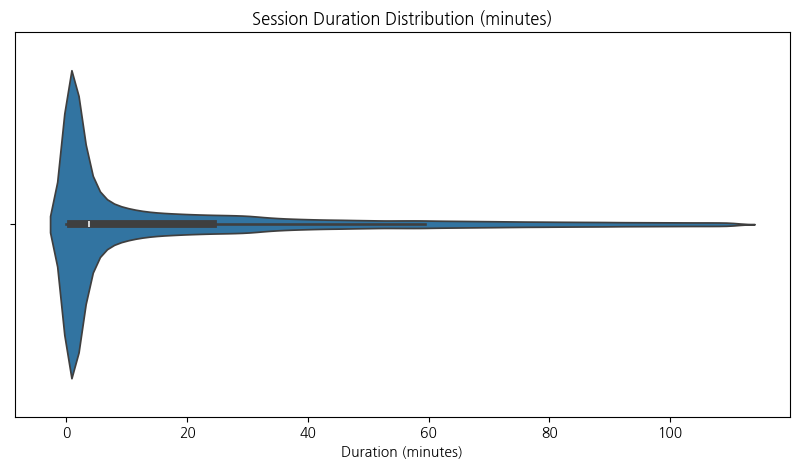

total: (6056080, 5)
    end_error count: 363157
    ratio: 0.0600
    mean_duration: 0 days 02:29:33.622607542
    


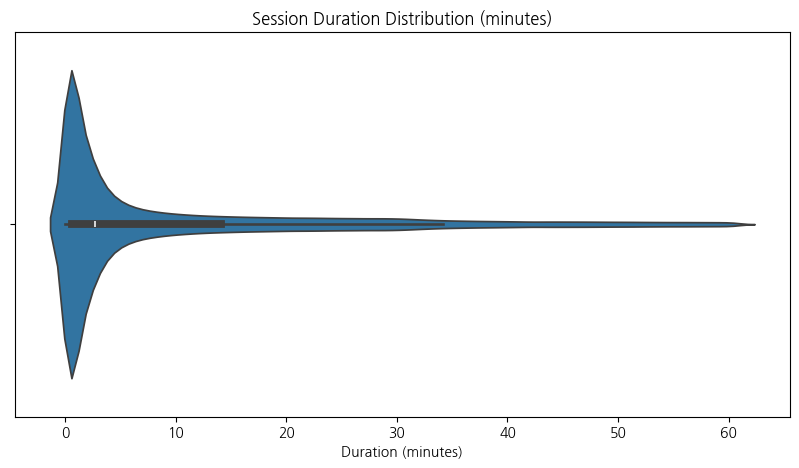

total: (4727950, 5)
    end_error count: 2189755
    ratio: 0.4632
    mean_duration: 0 days 01:43:26.127688081
    


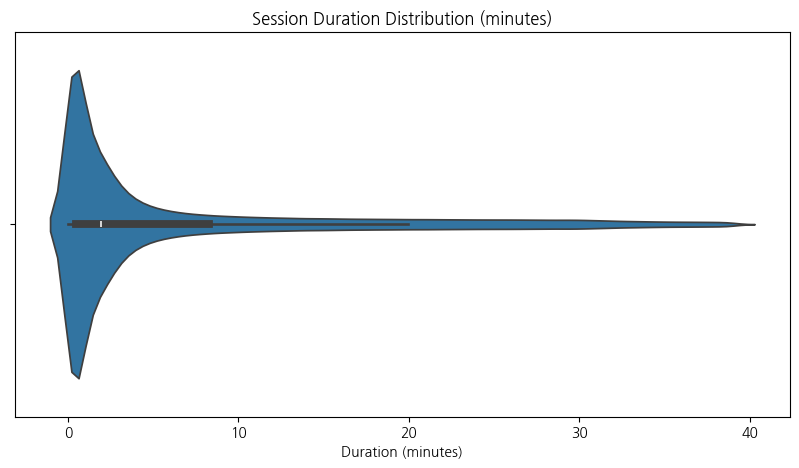

In [ ]:
timedata_info(df1.copy())
timedata_info(df2.copy())
timedata_info(df3.copy())